# Capstone Project - Auto Ticket Assignment to the right IT Functional Groups

# Text Classification with Machine Learning

## Agenda

1. Model building in scikit-learn (refresher)
2. Representing text as numerical data
3. Reading a text-based dataset into pandas
4. Vectorizing our dataset
5. Building and evaluating a model
6. Comparing models
7. Examining a model for further insight
8. Tuning the vectorizer

## 1: Model building in scikit-learn

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load libraries
import numpy as np
from numpy import arange
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

# SVM
from sklearn import svm

# Feature Engineering:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

# Clustering:
from sklearn.cluster import KMeans

# metrics:
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Label Encoding:
from sklearn.preprocessing import LabelEncoder

# Grid Search:
import multiprocessing 

# Imputer:
from sklearn.preprocessing import Imputer

# Zscores and Scaler:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler


# Decision Trees DT
#import graphviz
#from IPython.display import Image  

# PCA:
from sklearn.decomposition import PCA

# OS:
from os import system

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from keras.layers import Reshape, Dense, Flatten, Dropout,MaxPooling2D, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.metrics import make_scorer
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical
import tensorflow as tf
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer


import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
# import these modules 
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer


from sklearn.metrics import cohen_kappa_score
#from xgboost import XGBClassifier
#from xgboost import plot_importance

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Using TensorFlow backend.


In [4]:
# Load datasets from various excel files
df1 = pd.read_excel("incident-Jul 2016-Oct2016.xlsx")
df2 = pd.read_excel("incident-Nov 2016-Feb2017.xlsx")
df3 = pd.read_excel("incident-Mar 2017-Jun2017.xlsx")
df4 = pd.read_excel("incident-Jul 2017-Oct2017.xlsx")
df5 = pd.read_excel("incident-Nov 2017-Feb2018.xlsx")
df6 = pd.read_excel("incident-Mar 2018-Jun2018.xlsx")
df7 = pd.read_excel("incident-Jul 2018-Oct2018.xlsx")

In [5]:
# Load Test data set separately
df_val = pd.read_excel("incident-Nov 2018-Feb2019-Test.xlsx")

In [6]:
# Load Test data set separately
df_map = pd.read_excel("GROUP MAPPING.xlsx")

In [7]:
df_map.head()

,AG,New AG
0,GSO - Service Desk,L1/L2
1,Data Center Operations,DAC
2,Windows Server Support,Windows Server
3,Business Analytics Technical Team,Business Analytics
4,Security Admin,Security


In [8]:
# Look at the shape / number of records in each file
print("df1 shape -", df1.shape)
print("df2 shape -", df2.shape)
print("df3 shape -", df3.shape)
print("df4 shape -", df4.shape)
print("df5 shape -", df5.shape)
print("df6 shape -", df6.shape)
print("df7 shape -", df7.shape)
print("Validation Data shape -", df_val.shape)

df1 shape - (25420, 12)
df2 shape - (24240, 12)
df3 shape - (25230, 12)
df4 shape - (23479, 12)
df5 shape - (24306, 12)
df6 shape - (25238, 12)
df7 shape - (26986, 12)
Validation Data shape - (25661, 12)


In [9]:
# Get the overall size of the dataset / number of records
test = (df1.shape[0] + df2.shape[0] + df3.shape[0] + df4.shape[0] + df5.shape[0] + df6.shape[0] + df7.shape[0])
test

174899

In [10]:
df_val.columns

Index(['Number', 'Priority', 'Caller [Incident]', 'Assignment group',
       'Created', 'Assigned to', 'Caller', 'Department', 'Short description',
       'Description', 'Resolved', 'Reassignment count'],
      dtype='object')

In [11]:
# concatenate all the files into one dataframe
frames = [df1, df2, df3, df4, df5, df6, df7]
sn_df = pd.concat(frames)
sn_df.head()

,Number,Priority,Caller [Incident],Assignment group,Created,Assigned to,Caller,Department,Short description,Description,Resolved,Reassignment count
0,INC0454829,Sev4–Single User Issue-Not Urgent <=20 Days Re...,Brian Conrad,GSO - Service Desk,2016-10-31 23:40:58,Tarun Vakharia,Brian Conrad,IFBG,login issue,-Verified user details.(Employee# & Manager na...,2016-10-31 23:40:58,0
1,INC0454813,Sev4–Single User Issue-Not Urgent <=20 Days Re...,Kim Walker,GSO - Service Desk,2016-10-31 22:42:56,Tarun Vakharia,Kim Walker,INBG,OUTLOOK,\n\nreceived from: kim.walker@kennametal.com\n...,2016-10-31 23:59:10,0
2,INC0454796,Sev4–Single User Issue-Not Urgent <=20 Days Re...,Jaques Van Der Berg,GSO - Service Desk,2016-10-31 19:58:48,Tarun Vakharia,Jaques Van Der Berg,IFBG,Cant log in to VPN,\n\nreceived from: Jaques.VanDerBerg@kennameta...,2016-10-31 20:34:19,0
3,INC0454795,Sev4–Single User Issue-Not Urgent <=20 Days Re...,John Johnson,GSO - Service Desk,2016-10-31 20:01:34,Ranjith J,John Johnson,INBG,Unable to access adp page,Unable to access adp page,2016-10-31 20:01:34,0
4,INC0454791,Sev4–Single User Issue-Not Urgent <=20 Days Re...,Ian Bonnar,GSO - Service Desk,2016-10-31 19:21:35,Ranjith J,Ian Bonnar,NaN,Unable to log in to Euremote,Unable to log in to Euremote,2016-10-31 19:21:35,0


In [12]:
df_val.head()

,Number,Priority,Caller [Incident],Assignment group,Created,Assigned to,Caller,Department,Short description,Description,Resolved,Reassignment count
0,INC0759016,Sev4–Single User Issue-Not Urgent <=20 Days Re...,Nishant Mahere,GSO - Service Desk,2019-02-28 22:55:57,Swastik Goswami,Nishant Mahere,IFBG,Regarding SAP Login,\n\nreceived from: Nishant.Mahere@kennametal.c...,2019-02-28 23:36:22,0
1,INC0759012,Sev4–Single User Issue-Not Urgent <=20 Days Re...,Shawn Blevins,GSO - Service Desk,2019-02-28 22:51:57,Swastik Goswami,Shawn Blevins,HRES,Potential Phish: [External] Snelling - Best of...,\n\nreceived from: shawn.blevins@kennametal.co...,2019-02-28 23:46:20,0
2,INC0759004,Sev4–Single User Issue-Not Urgent <=20 Days Re...,Jiangang Zhu,GSO - Service Desk,2019-02-28 22:28:11,Swastik Goswami,Jiangang Zhu,INBG,Potential Phish: [External] Your account has b...,\n\nreceived from: Jerry.Zhu@kennametal.com\n\n,2019-02-28 22:53:19,0
3,INC0759002,Sev4–Single User Issue-Not Urgent <=20 Days Re...,Pattama Nopsiri,GSO - Service Desk,2019-02-28 22:18:43,Swastik Goswami,Pattama Nopsiri,FINA,account lock/expiry issue,\n\nreceived from: Pattama.Nopsiri@kennametal....,2019-02-28 22:47:20,0
4,INC0758998,Sev4–Single User Issue-Not Urgent <=20 Days Re...,Pritham Rao,GSO - Service Desk,2019-02-28 22:16:43,Swastik Goswami,Pritham Rao,INBG,Potential Phish: February 2019 Phish Results,\n\nreceived from: pritham.rao@kennametal.com\n\n,2019-02-28 23:15:57,0


In [13]:
sn_df.shape

(174899, 12)

In [14]:
agdf1 = dict(zip(df_map['AG'],df_map['New AG']))
sn_df['Assignment group new'] = sn_df['Assignment group'].map(agdf1)

In [15]:
agdf1 = dict(zip(df_map['AG'],df_map['New AG']))
df_val['Assignment group new'] = df_val['Assignment group'].map(agdf1)

In [16]:
sn_df.head(1)

,Number,Priority,Caller [Incident],Assignment group,Created,Assigned to,Caller,Department,Short description,Description,Resolved,Reassignment count,Assignment group new
0,INC0454829,Sev4–Single User Issue-Not Urgent <=20 Days Re...,Brian Conrad,GSO - Service Desk,2016-10-31 23:40:58,Tarun Vakharia,Brian Conrad,IFBG,login issue,-Verified user details.(Employee# & Manager na...,2016-10-31 23:40:58,0,L1/L2


## Data Pre-processing

In [17]:
#pd.pivot_table(sn_df,index=["Assignment group"],values=["Number"],aggfunc="count").head(10)
var = pd.pivot_table(sn_df,index=["Assignment group"],values=["Number"],aggfunc="count").reset_index().head(60)
var.reset_index()
var.head()

,Assignment group,Number
0,ABAP Pool,297
1,AEM – Content,3
2,Active Directory Support,549
3,Amcom Services,10
4,Americas - PC Services,5805


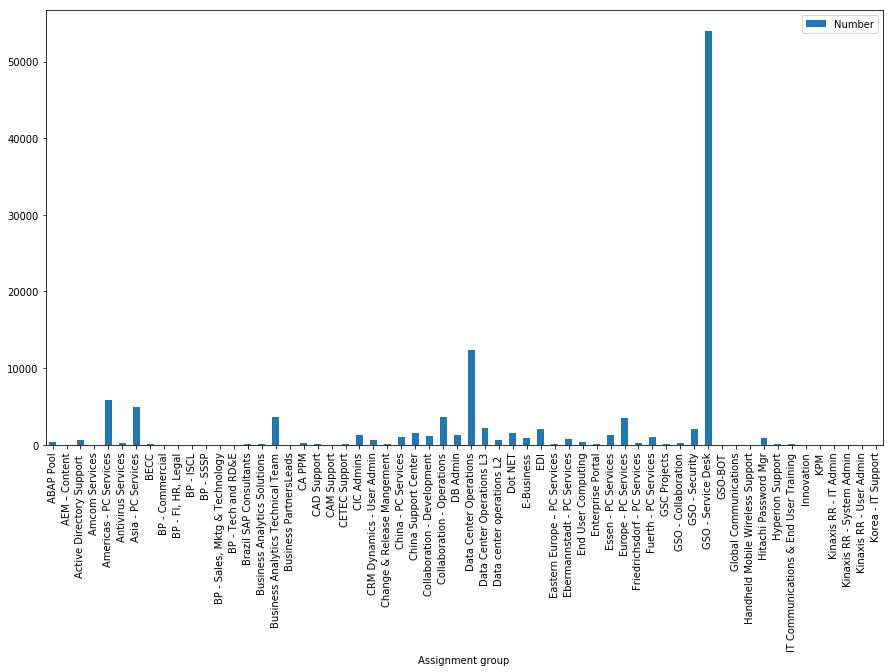

In [18]:
var = pd.pivot_table(sn_df,index=["Assignment group"],values=["Number"],aggfunc="count").head(60)
#plt.figure(figsize = (15,8))
#ax1.set_xlabel('Assigment Group')
#ax1.set_ylabel('Count of Tickets')
#ax1.set_title("Group wise Tickets")
#plt.title("Group wise Tickets")
var.plot(kind='bar',figsize = (15,8))

In [19]:
# Create a Type column with first 3 letters from Number - Incident - INC or Generic Request - GRE
sn_df["Type"] = sn_df["Number"].str[0:3]
df_val["Type"] = df_val["Number"].str[0:3]
sn_df["Severity"] = sn_df["Priority"].str[0:4]
df_val["Severity"] = df_val["Priority"].str[0:4]
sn_df.head()

,Number,Priority,Caller [Incident],Assignment group,Created,Assigned to,Caller,Department,Short description,Description,Resolved,Reassignment count,Assignment group new,Type,Severity
0,INC0454829,Sev4–Single User Issue-Not Urgent <=20 Days Re...,Brian Conrad,GSO - Service Desk,2016-10-31 23:40:58,Tarun Vakharia,Brian Conrad,IFBG,login issue,-Verified user details.(Employee# & Manager na...,2016-10-31 23:40:58,0,L1/L2,INC,Sev4
1,INC0454813,Sev4–Single User Issue-Not Urgent <=20 Days Re...,Kim Walker,GSO - Service Desk,2016-10-31 22:42:56,Tarun Vakharia,Kim Walker,INBG,OUTLOOK,\n\nreceived from: kim.walker@kennametal.com\n...,2016-10-31 23:59:10,0,L1/L2,INC,Sev4
2,INC0454796,Sev4–Single User Issue-Not Urgent <=20 Days Re...,Jaques Van Der Berg,GSO - Service Desk,2016-10-31 19:58:48,Tarun Vakharia,Jaques Van Der Berg,IFBG,Cant log in to VPN,\n\nreceived from: Jaques.VanDerBerg@kennameta...,2016-10-31 20:34:19,0,L1/L2,INC,Sev4
3,INC0454795,Sev4–Single User Issue-Not Urgent <=20 Days Re...,John Johnson,GSO - Service Desk,2016-10-31 20:01:34,Ranjith J,John Johnson,INBG,Unable to access adp page,Unable to access adp page,2016-10-31 20:01:34,0,L1/L2,INC,Sev4
4,INC0454791,Sev4–Single User Issue-Not Urgent <=20 Days Re...,Ian Bonnar,GSO - Service Desk,2016-10-31 19:21:35,Ranjith J,Ian Bonnar,NaN,Unable to log in to Euremote,Unable to log in to Euremote,2016-10-31 19:21:35,0,L1/L2,INC,Sev4


In [20]:
sn_df.columns

Index(['Number', 'Priority', 'Caller [Incident]', 'Assignment group',
       'Created', 'Assigned to', 'Caller', 'Department', 'Short description',
       'Description', 'Resolved', 'Reassignment count', 'Assignment group new',
       'Type', 'Severity'],
      dtype='object')

In [21]:
ty_sev = sn_df[(sn_df["Type"] == "INC") & (sn_df["Severity"] == "Sev1")]
ty_sev.shape
# Sev1 incidents

(460, 15)

In [22]:
# Incident dataframe
sn_inc = sn_df[(sn_df["Type"] == "INC")]

In [23]:
sn_inc["Severity"].value_counts()

Sev4    95071
Sev3     2412
Sev2     1780
Sev1      460
4–Si      329
5 -        60
4U–S       22
3–Me       17
2–Pr        7
Name: Severity, dtype: int64

In [24]:
print("Data Set -\n", sn_df["Type"].value_counts())
print("Validation Set - \n", df_val["Type"].value_counts())

Data Set -
 INC    100159
GRE     74740
Name: Type, dtype: int64
Validation Set - 
 INC    16721
GRE     8940
Name: Type, dtype: int64


In [25]:
sn_inc['Reassignment count'].value_counts()

0     70883
1     21842
2      5649
3      1155
4       374
5       149
6        59
7        20
8        13
9        11
10        3
11        1
Name: Reassignment count, dtype: int64

In [26]:
#pareto chart
chart1 = pd.DataFrame()

In [27]:
chart1['count']=sn_inc['Assignment group'].value_counts()
#sn_df['Assignment group'].value_counts()#sn_df.groupby(['Assignment group', 'group', 'term']).size().unstack(fill_value=0)

In [28]:
chart1 = chart1.sort_values(by='count',ascending=False)

In [29]:
chart1["cumpercentage"] = chart1["count"].cumsum()/chart1["count"].sum()*100

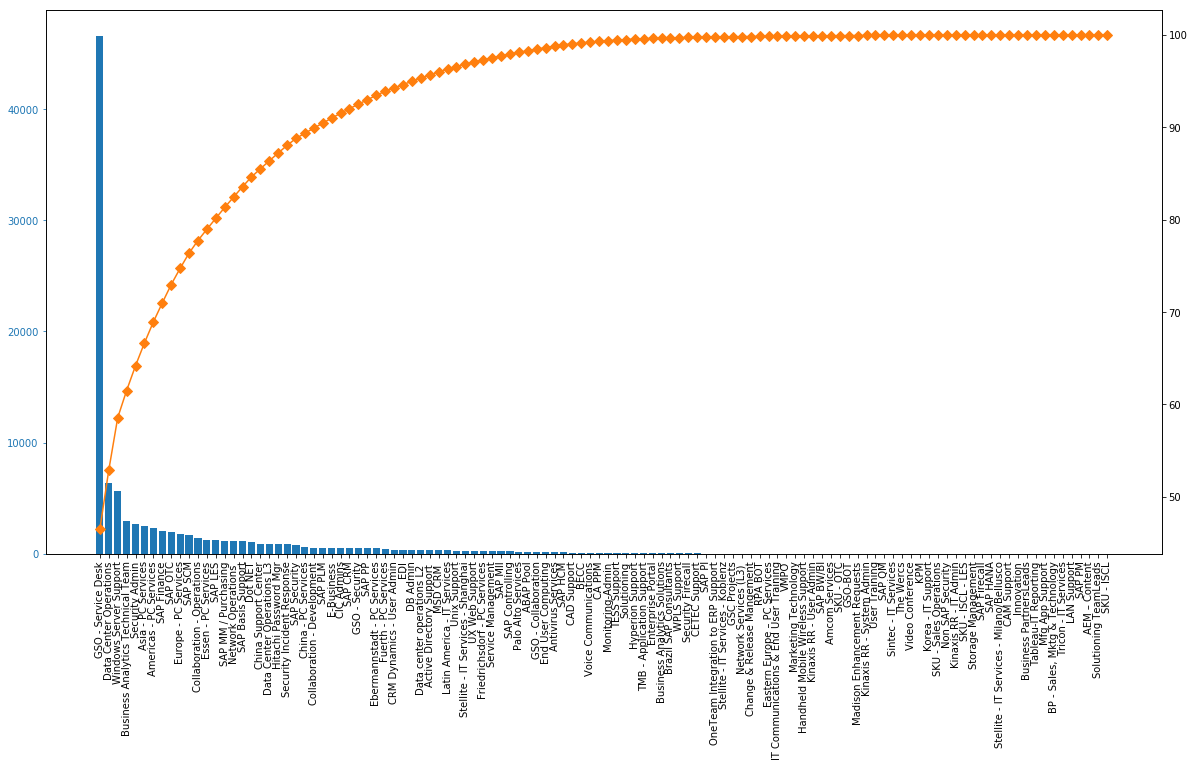

In [30]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(chart1.index, chart1["count"], color="C0")
plt.xticks(rotation='vertical')
ax2 = ax.twinx()
ax2.plot(chart1.index, chart1["cumpercentage"], color="C1", marker="D", ms=7)
ax.tick_params(axis="y", colors="C0")
plt.xticks(rotation='vertical')
#ax2.tick_params(axis="y", colors="C1")
plt.show()

Problem Statement:
Data center operations L2	570
Data Center Operations	12398
GSC Projects	28
GSO - Collaboration	234
GSO - Security	2111
GSO - Service Desk	54053
Total L1 and L2 Tickets 	69394
Overall Tickets 	174899
L1 / L2 Ticket Closure = 40%
Per year calculations: Assuming 15 min of effort for each SOP and 30% of L1/L2 tickets go through SOPs
@30% of 69394 = 20818
@ 15 min per SOP = 5205 hours for 2.4 years, 2169 hours per year
Which is equivalent to 1 FTE
Sev 1 Incidents = 460 / 100159 = 0.5%
Total Re-assigned Tickets (post assigning to one of the Functional teams) = 174899 - 115142 - 45037 = 14720
Total tickets assigned by L1 / L2 to other functional teams = 174899 - 69394 = 105505
Assuming 25-30% of 105505 are assigned directly to the functional teams by Users / Monitoring Tools = 31652
% Tickets getting re-assigned post L1 / L2 assigned to functional teams = 14720 / (105505 - 31652) = 20%

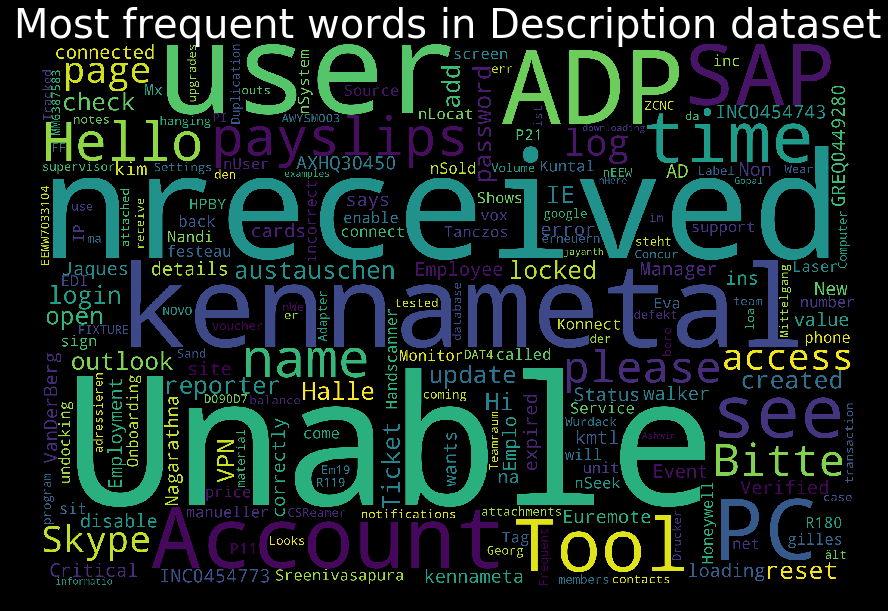

In [31]:
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization 
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python

# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS)
# generate word cloud using df_yelp_tip_top['text_clear']
wc_word=wc.generate(str(sn_inc['Description']))
print(wc_word)
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title("Most frequent words in Description dataset", fontsize=40,color='white')
plt.imshow(wc_word)
plt.show()

### Identifying Nan values and taking care by replacing with "THE" values

In [32]:
# Identify null values from Description
nan_rows = sn_inc[sn_inc['Description'].isnull()]
print("Data Set Length with Null Values in Description Column -",len(nan_rows))
nan_rows = df_val[df_val['Description'].isnull()]
print("Test Data Set Length with Null Values in Description Column -",len(nan_rows))

Data Set Length with Null Values in Description Column - 649
Test Data Set Length with Null Values in Description Column - 54


In [33]:
# Replace Nan values in Description to THE - since this stop word will be eliminated in the vectorization
sn_inc["Description"].fillna("The", inplace=True)
df_val["Description"].fillna("The", inplace=True)

In [34]:
# Identify null values from Short Description
nan_rows = sn_inc[sn_inc['Short description'].isnull()]
print("Data Set Length with Null Values in Short Description Column -",len(nan_rows))
nan_rows = df_val[df_val['Short description'].isnull()]
print("Test Data Set Length with Null Values in Short Description Column -",len(nan_rows))

Data Set Length with Null Values in Short Description Column - 2
Test Data Set Length with Null Values in Short Description Column - 0


In [35]:
# Replace Nan values in Short description to THE - since this stop word will be eliminated in the vectorization
sn_inc["Short description"].fillna("The", inplace=True)
df_val["Short description"].fillna("The", inplace=True)

### Convert to Lower case

In [36]:
sn_inc1=sn_inc.copy()
df_val1=df_val.copy()

In [37]:
sn_inc1['Description'] = sn_inc1['Description'].apply(lambda x: x.lower())
sn_inc1['Short description'] = sn_inc1['Short description'].apply(lambda x: x.lower())

In [38]:
df_val1['Description'] = df_val1['Description'].apply(lambda x: x.lower())
df_val1['Short description'] = df_val1['Short description'].apply(lambda x: x.lower())

### Remove punctuations, digits,special characters

In [39]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
def remove_punct(text):
    text = re.sub('[0-9]+|\n|\r|[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', ' ', text)
    return text

In [41]:
import re
sn_inc1['Description_new'] = sn_inc1['Description'].apply(lambda x: remove_punct(x))
sn_inc1['Short description'] = sn_inc1['Short description'].apply(lambda x: remove_punct(x))

In [42]:
sn_inc1[['Description','Description_new']].head(10)

,Description,Description_new
0,-verified user details.(employee# & manager na...,verified user details employee manager na...
1,\n\nreceived from: kim.walker@kennametal.com\n...,received from kim walker kennametal com he...
2,\n\nreceived from: jaques.vanderberg@kennameta...,received from jaques vanderberg kennametal ...
3,unable to access adp page,unable to access adp page
4,unable to log in to euremote,unable to log in to euremote
5,skype error,skype error
6,unable to log in to tool reporter and skype,unable to log in to tool reporter and skype
7,event: critical:axhq30450.kmtl.com the value o...,event critical axhq kmtl com the value of mo...
8,greq0449280- employment status - new non-emplo...,greq employment status new non employee e...
9,unable to disable add ins on outlook,unable to disable add ins on outlook


In [43]:
df_val1['Description'] = df_val1['Description'].apply(lambda x: remove_punct(x))
df_val1['Short description'] = df_val1['Short description'].apply(lambda x: remove_punct(x))

In [44]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [45]:
DD=sn_inc1['Description_new'].head(10)

In [46]:
#Creating a sets whith all distinct words for short description
from nltk.tokenize import word_tokenize
tokenized_word_DD=word_tokenize(str(DD))
#testing for 10 words so seprated

In [47]:
top10=tokenized_word_DD[:20]
top10

['0',
 'verified',
 'user',
 'details',
 'employee',
 'manager',
 'na',
 '...',
 '1',
 'received',
 'from',
 'kim',
 'walker',
 'kennametal',
 'com',
 'he',
 '...',
 '2',
 'received',
 'from']

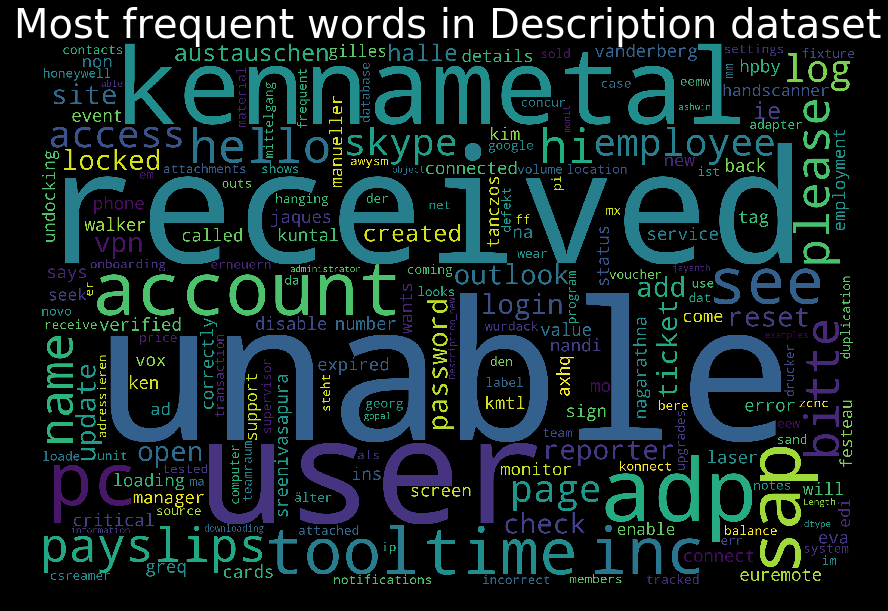

In [48]:
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization 
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python

# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS)
# generate word cloud using df_yelp_tip_top['text_clear']
wc_word=wc.generate(str(sn_inc1['Description_new']))
print(wc_word)
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title("Most frequent words in Description dataset", fontsize=40,color='white')
plt.imshow(wc_word)
plt.show()

In [49]:
def searchRE(regex, value, s):
    #print(regex)
    s = re.sub(regex,value,s)
    return s

### Remove Accented Characters

In [50]:
accented_string = 'Málaga'
import unidecode
uc = unidecode
unaccented_string = uc.unidecode(accented_string)
unaccented_string

'Malaga'

In [51]:
sn_inc=sn_inc1.copy()
df_val=df_val1.copy()

In [52]:
sn_inc['Description_new'] = sn_inc['Description_new'].apply(lambda x: uc.unidecode(x))
sn_inc['Short description'] = sn_inc['Short description'].apply(lambda x: uc.unidecode(x))

In [53]:
df_val['Description'] = df_val['Description'].apply(lambda x: uc.unidecode(x))
df_val['Short description'] = df_val['Short description'].apply(lambda x: uc.unidecode(x))

In [54]:
pd.set_option('max_colwidth', 100)
sn_inc['Description_new'].head()

0     verified user details  employee    manager name   checked the user name in ad and reset the pas...
1      received from  kim walker kennametal com  hello team   my meetings skype meetings etc are not ...
2      received from  jaques vanderberg kennametal com  hi  i cannot log on to vpn  best regards  jaq...
3                                                                              unable to access adp page
4                                                                           unable to log in to euremote
Name: Description_new, dtype: object

### Remove Stop Words

In [55]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'further', 'those', 'ours', 'by', 's', 'don', 'each', 'yours', 'if', 'both', "couldn't", 'isn', 'weren', 'how', 'had', 'with', "doesn't", 'my', 'over', 'did', 'these', 'having', 'on', 'up', "you'll", 'me', 'being', 'the', 'until', 'its', 'nor', "you'd", "shouldn't", 'you', "aren't", 'herself', 'under', 't', 'out', "haven't", 'too', 'o', 'before', 'has', 'than', 'it', 'can', 'through', 'y', 'just', 'now', 'her', 'during', "isn't", 'hadn', 'as', 'itself', "weren't", 'should', 'below', 'myself', 'shouldn', 'ain', 'him', 'all', 'couldn', 'this', 'few', 'most', 'for', 'against', 'only', 'they', 'what', 'and', "that'll", 'i', 'from', 'yourself', "don't", "mightn't", 'is', 'them', 'so', "hasn't", 'yourselves', 'didn', 'we', 'while', "wouldn't", 'does', 'some', "hadn't", 'mustn', "shan't", 'whom', 'when', 'or', 'have', 'off', 'his', 'to', 'in', 'hasn', 'a', 'll', 'because', 'am', 'no', "won't", 'here', "didn't", 'ourselves', 'theirs', 'mightn', 'been', 'not', 'then', 'where', "should've", 'bu

In [56]:
num = ["0","1","2","3","4","5", "6", "7","8", "9", "10","11", "12", "13","14", "15", "16","17", "18", "19","20","21","22","23","24","hello","hi","name",
       "25","26","91","92","93","99","999","...","-",",",":","kennametal.","Kennametal","kennametal.com","\n",")","/s","@","#",".","www","http","com","widia","regards","thanks","thankyou","thank you","best regards","kind regards","ksspl","kennametal india","kennametal mailto","kennametal","hello","bitte","please","received","phone","see","receive","created","team"]
for i in num: 
    stop_words.add(i)

In [57]:
print(stop_words)

{'further', 'com', 'those', 'ours', 'by', 's', 'don', '99', 'hi', 'each', 'name', 'yours', '23', 'see', 'if', 'both', "couldn't", 'isn', '...', 'weren', 'how', 'had', 'with', "doesn't", 'ksspl', 'my', 'over', 'did', 'these', 'having', 'kennametal', 'on', 'up', "you'll", 'me', 'Kennametal', 'being', 'the', 'until', 'its', 'nor', '17', 'widia', "you'd", "shouldn't", '6', 'bitte', 'you', "aren't", 'team', 'herself', '\n', 'under', 'thank you', 't', '18', 'out', '14', "haven't", 'too', 'o', 'before', '25', 'has', 'than', 'it', 'can', 'through', 'y', 'just', 'now', 'her', 'during', "isn't", 'hadn', 'please', 'as', 'itself', "weren't", 'should', ',', 'below', 'myself', 'shouldn', 'ain', '/s', '11', 'him', '#', 'all', 'couldn', 'this', 'few', 'most', 'for', 'against', '3', 'only', 'they', 'what', 'and', '10', '16', 'kennametal.com', "that'll", 'i', 'from', 'yourself', "don't", "mightn't", 'is', 'them', 'so', '19', 'receive', '.', 'www', 'thankyou', "hasn't", 'yourselves', 'didn', 'we', 'regar

In [58]:
sn_inc['Description_new1'] = sn_inc['Description_new'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
sn_inc['Short description'] = sn_inc['Short description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [59]:
df_val['Description'] = df_val['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_val['Short description'] = df_val['Short description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [60]:
sn_inc[['Description','Description_new','Description_new1']].head(10)

,Description,Description_new,Description_new1
0,-verified user details.(employee# & manager name)\n-checked the user name in ad and reset the pa...,verified user details employee manager name checked the user name in ad and reset the pas...,verified user details employee manager checked user ad reset password advised user login check c...
1,"\n\nreceived from: kim.walker@kennametal.com\n\nhello team,\n\nmy meetings/skype meetings etc ar...",received from kim walker kennametal com hello team my meetings skype meetings etc are not ...,kim walker meetings skype meetings etc appearing outlook calendar somebody advise correct kind k...
2,\n\nreceived from: jaques.vanderberg@kennametal.com\n\nhi\n\ni cannot log on to vpn\n\nbest rega...,received from jaques vanderberg kennametal com hi i cannot log on to vpn best regards jaq...,jaques vanderberg cannot log vpn best jaques van der berg field sales engineer qld earthworks au...
3,unable to access adp page,unable to access adp page,unable access adp page
4,unable to log in to euremote,unable to log in to euremote,unable log euremote
5,skype error,skype error,skype error
6,unable to log in to tool reporter and skype,unable to log in to tool reporter and skype,unable log tool reporter skype
7,event: critical:axhq30450.kmtl.com the value of mountpoint threshold for /oracle/p21/sapdata21/s...,event critical axhq kmtl com the value of mountpoint threshold for oracle p sapdata sr psa ...,event critical axhq kmtl value mountpoint threshold oracle p sapdata sr psa sr psa data psapsr psa
8,greq0449280- employment status - new non-employee [enter user's name],greq employment status new non employee enter user s name,greq employment status new non employee enter user
9,unable to disable add ins on outlook,unable to disable add ins on outlook,unable disable add ins outlook


In [61]:
## Update the Description field itself
sn_inc['Description'] = sn_inc['Description_new'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

### Remove disclaimer text

In [62]:
import re
text1 = "THIS COMMUNICATION IS INTENDED FOR THE SOLE USE OF THE PERSON TO WHOM IT IS ADDRESSED AND MAY CONTAIN INFORMATION THAT IS PRIVILEGED, CONFIDENTIAL AND EXEMPT FROM DISCLOSURE UNDER APPLICABLE LAW. ANY DISSEMINATION, DISTRIBUTION OR DUPLICATION OF THIS COMMUNICATION BY SOMEONE OTHER THAN THE INTENDED RECIPIENT IS STRICTLY PROHIBITED. IF YOUR RECEIPT OF THIS COMMUNICATION IS IN ERROR, PLEASE NOTIFY THE SENDER AND DELETE THIS COMMUNICATION"
sn_inc['Description'] = sn_inc['Description'].apply(lambda x: searchRE(text1,'',x))
df_val['Description'] = df_val['Description'].apply(lambda x: searchRE(text1,'',x))

In [63]:
text2 = "Select the following link to view the Disclaimer in an alternate language."

In [64]:
sn_inc['Description'] = sn_inc['Description'].apply(lambda x: searchRE(text2,'',x))
df_val['Description'] = df_val['Description'].apply(lambda x: searchRE(text2,'',x))

<FreqDist with 473 samples and 651 outcomes>


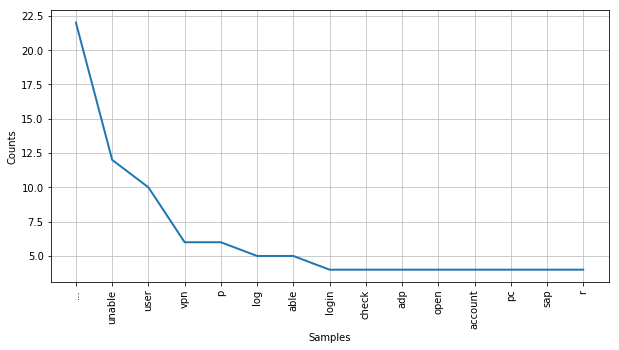

In [65]:
#Creating a sets whith all distinct words for description and plot
plt.figure(figsize = (10,5))
DD=sn_inc['Description']
tokenized_word_DD=word_tokenize(str(DD))
#testing for 10 words so seprated
from nltk.probability import FreqDist
DDfreq = FreqDist(tokenized_word_DD)
print(DDfreq)
topword= DDfreq.most_common(10)
topword
DDfreq.plot(15,cumulative=False)
plt.show()

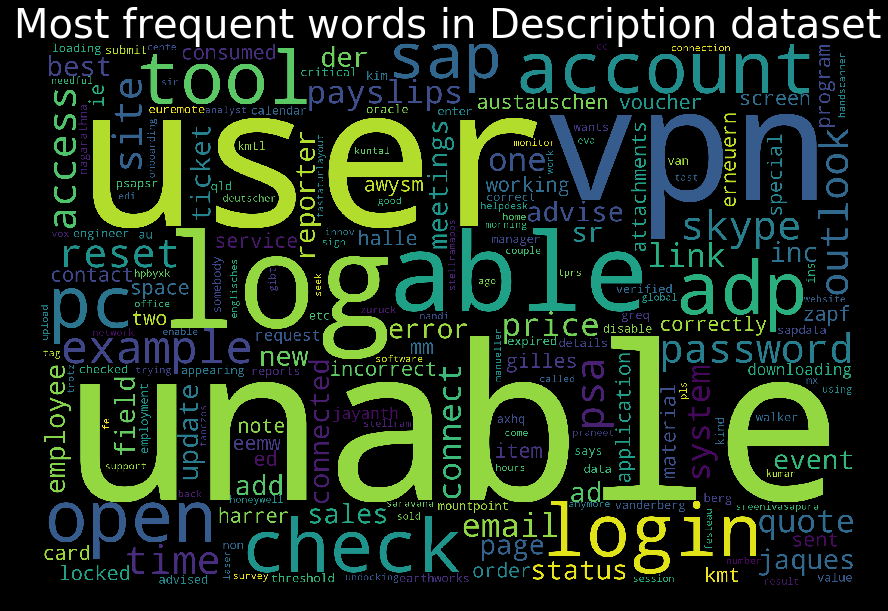

In [66]:
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS)
# generate word cloud using df_yelp_tip_top['text_clear']
wc_word=wc.generate(str(sn_inc['Description']))
print(wc_word)
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title("Most frequent words in Description dataset", fontsize=40,color='white')
plt.imshow(wc_word)
plt.show()

### Feature Engineering

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

Join Short Description and Detailed Description to create a new column called SD - DD

In [68]:
# Join Short Description and Detailed Description to create a new column called SD - DD
sn_inc["SD - DD"] = sn_inc['Short description'].str.cat(sn_inc["Description"], sep= ' - ')
df_val["SD - DD"] = df_val['Short description'].str.cat(df_val["Description"], sep= ' - ')

In [69]:
# Identify null values from Description
nan_rows = sn_inc[sn_inc['SD - DD'].isnull()]
print("Data Set Length with Null Values in SD - DD Column -",len(nan_rows))
nan_rows = df_val[df_val['SD - DD'].isnull()]
print("Test Data Set Length with Null Values in SD - DD Column -",len(nan_rows))

Data Set Length with Null Values in SD - DD Column - 0
Test Data Set Length with Null Values in SD - DD Column - 0


Join Short Description and Detailed Description with Caller to create a new column called SD - DD - Caller

In [70]:
sn_inc.columns

Index(['Number', 'Priority', 'Caller [Incident]', 'Assignment group',
       'Created', 'Assigned to', 'Caller', 'Department', 'Short description',
       'Description', 'Resolved', 'Reassignment count', 'Assignment group new',
       'Type', 'Severity', 'Description_new', 'Description_new1', 'SD - DD'],
      dtype='object')

In [71]:
# Join Short Description and Detailed Description with Caller to create a new column called SD - DD - Caller
sn_inc["SD - DD - Caller"] = sn_inc['SD - DD'].str.cat(sn_inc["Caller"], sep= ' - ')
df_val["SD - DD - Caller"] = df_val['SD - DD'].str.cat(df_val["Caller"], sep= ' - ')

In [72]:
# Identify null values from Short Description
nan_rows = sn_inc[sn_inc['SD - DD - Caller'].isnull()]
print("Data Set Length with Null Values in SD - DD - Caller Column -",len(nan_rows))
nan_rows = df_val[df_val['SD - DD - Caller'].isnull()]
print("Test Data Set Length with Null Values in SD - DD - Caller Column -",len(nan_rows))

Data Set Length with Null Values in SD - DD - Caller Column - 2
Test Data Set Length with Null Values in SD - DD - Caller Column - 1


In [73]:
# Replace Nan values in Short description to THE - since this stop word will be eliminated in the vectorization
sn_inc["SD - DD - Caller"].fillna("The", inplace=True)
df_val["SD - DD - Caller"].fillna("The", inplace=True)

In [74]:
# Join Short Description and Detailed Description with Department to create a new column called SD - DD - Dept
sn_inc["SD - DD - Dept"] = sn_inc['SD - DD'].str.cat(sn_inc["Department"], sep= ' - ')
df_val["SD - DD - Dept"] = df_val['SD - DD'].str.cat(df_val["Department"], sep= ' - ')

In [75]:
# Identify null values from Short Department
nan_rows = sn_inc[sn_inc['SD - DD - Dept'].isnull()]
print("Data Set Length with Null Values in SD - DD - Dept Column -",len(nan_rows))
nan_rows = df_val[df_val['SD - DD - Dept'].isnull()]
print("Test Data Set Length with Null Values in SD - DD - Dept Column -",len(nan_rows))

Data Set Length with Null Values in SD - DD - Dept Column - 6414
Test Data Set Length with Null Values in SD - DD - Dept Column - 1726


In [76]:
# Replace Nan values in Short description to THE - since this stop word will be eliminated in the vectorization
sn_inc["SD - DD - Dept"].fillna("The", inplace=True)
df_val["SD - DD - Dept"].fillna("The", inplace=True)

In [77]:
# Join Short Description and Detailed Description and Caller with Department to create a new column called SD - DD - Caller - Dept
sn_inc["SD - DD - Caller - Dept"] = sn_inc['SD - DD - Caller'].str.cat(sn_inc["Department"], sep= ' - ')
df_val["SD - DD - Caller - Dept"] = df_val['SD - DD - Caller'].str.cat(df_val["Department"], sep= ' - ')

In [78]:
# Identify null values from Short Description
nan_rows = sn_inc[sn_inc['SD - DD - Caller - Dept'].isnull()]
print("Data Set Length with Null Values in SD - DD - Caller - Dept Column -",len(nan_rows))
nan_rows = df_val[df_val['SD - DD - Caller - Dept'].isnull()]
print("Test Data Set Length with Null Values in SD - DD - Caller - Dept Column -",len(nan_rows))

Data Set Length with Null Values in SD - DD - Caller - Dept Column - 6414
Test Data Set Length with Null Values in SD - DD - Caller - Dept Column - 1726


In [79]:
# Replace Nan values in Short description to THE - since this stop word will be eliminated in the vectorization
sn_inc["SD - DD - Caller - Dept"].fillna("The", inplace=True)
df_val["SD - DD - Caller - Dept"].fillna("The", inplace=True)

In [80]:
print("Data Set Shape - ",sn_inc.shape)
print("Validation Data Set Shape - ",df_val.shape)

Data Set Shape -  (100159, 21)
Validation Data Set Shape -  (25661, 19)


In [81]:
# Drop few columns - Department, Assigned to columns (as many of the values are missing Department column)
sn_inc = sn_inc.drop({"Assigned to","Priority","Caller","Number","Resolved","Created","Reassignment count","Severity","Type","Description_new","Description_new1"}, axis=1)
df_val = df_val.drop({"Assigned to","Priority","Caller","Number","Resolved","Created","Severity"}, axis=1)

In [82]:
sn_inc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100159 entries, 0 to 16885
Data columns (total 10 columns):
Caller [Incident]          100157 non-null object
Assignment group           100132 non-null object
Department                 93745 non-null object
Short description          100159 non-null object
Description                100159 non-null object
Assignment group new       100120 non-null object
SD - DD                    100159 non-null object
SD - DD - Caller           100159 non-null object
SD - DD - Dept             100159 non-null object
SD - DD - Caller - Dept    100159 non-null object
dtypes: object(10)
memory usage: 8.4+ MB


In [83]:
# Check for null values
sn_inc[sn_inc.isnull().any(axis=1)]

,Caller [Incident],Assignment group,Department,Short description,Description,Assignment group new,SD - DD,SD - DD - Caller,SD - DD - Dept,SD - DD - Caller - Dept
4,Ian Bonnar,GSO - Service Desk,NaN,unable log euremote,unable log euremote,L1/L2,unable log euremote - unable log euremote,unable log euremote - unable log euremote - Ian Bonnar,The,The
17,Jeff Simpson,Security Admin,NaN,account expired ad,account expired ad,Security,account expired ad - account expired ad,account expired ad - account expired ad - Jeff Simpson,The,The
39,VOX Tech Support,GSO - Service Desk,NaN,call vox verify account russel preston locked,call vox verify account russel preston locked,L1/L2,call vox verify account russel preston locked - call vox verify account russel preston locked,call vox verify account russel preston locked - call vox verify account russel preston locked - ...,The,The
48,Avinash Dubey,GSO - Service Desk,NaN,able open reset password sap,sap password expired consequently able login changed password changed sap allowing reset passwor...,L1/L2,able open reset password sap - sap password expired consequently able login changed password cha...,able open reset password sap - sap password expired consequently able login changed password cha...,The,The
63,Alexandru Rad-Taut,GSO - Service Desk,NaN,help user vvbodor change password,could assist robert vvbodor change password kind alex,L1/L2,help user vvbodor change password - could assist robert vvbodor change password kind alex,help user vvbodor change password - could assist robert vvbodor change password kind alex - Alex...,The,The
70,Helmut Niebler,GSO - Service Desk,NaN,sap access,helmut niebler dear could reset password access sap vvniebh thank cid image png e b de mit freun...,L1/L2,sap access - helmut niebler dear could reset password access sap vvniebh thank cid image png e b...,sap access - helmut niebler dear could reset password access sap vvniebh thank cid image png e b...,The,The
81,Audrey Pan,GSO - Service Desk,NaN,password citrix sap outlook valid,vvzhanq user changed password citrix morning cannot open outlook sap new password log citrix tri...,L1/L2,password citrix sap outlook valid - vvzhanq user changed password citrix morning cannot open out...,password citrix sap outlook valid - vvzhanq user changed password citrix morning cannot open out...,The,The
112,Madhu Reddy,GSO - Service Desk,NaN,unable log sap,madhu reddy tried logon sap account happening madhu reddy manager facility administration india ...,L1/L2,unable log sap - madhu reddy tried logon sap account happening madhu reddy manager facility admi...,unable log sap - madhu reddy tried logon sap account happening madhu reddy manager facility admi...,The,The
123,Lanita Jackson,GSO - Service Desk,NaN,unable access sap p,unable access sap p,L1/L2,unable access sap p - unable access sap p,unable access sap p - unable access sap p - Lanita Jackson,The,The
170,Eamonn O'Halloran,GSO - Service Desk,NaN,account locking,account locking,L1/L2,account locking - account locking,account locking - account locking - Eamonn O'Halloran,The,The


In [84]:
# Drop the rows that have null values in Assignment Groups
sn_inc = sn_inc.dropna(subset=["Assignment group"])
df_val = df_val.dropna(subset=["Assignment group"])

In [85]:
# Drop the rows that have null values in Assignment Groups
sn_inc = sn_inc.dropna(subset=["Assignment group new"])
df_val = df_val.dropna(subset=["Assignment group new"])

In [86]:
# Identify null values from Department
nan_rows = sn_inc[sn_inc['Department'].isnull()]
print("Data Set Length with Null Values in Department Column -",len(nan_rows))
nan_rows = df_val[df_val['Department'].isnull()]
print("Test Data Set Length with Null Values in Department Column -",len(nan_rows))

Data Set Length with Null Values in Department Column - 6411
Test Data Set Length with Null Values in Department Column - 1725


## Varying X and Models, y = Assignment Group

In [87]:
sn_inc.columns

Index(['Caller [Incident]', 'Assignment group', 'Department',
       'Short description', 'Description', 'Assignment group new', 'SD - DD',
       'SD - DD - Caller', 'SD - DD - Dept', 'SD - DD - Caller - Dept'],
      dtype='object')

In [88]:
# Create a copy of the data frame to carry out label encoding
sn_df1 = sn_inc.copy()
# Label encoding for Assignment Group
le = LabelEncoder()
le.fit(sn_df1['Assignment group'])
sn_df1['Assignment Group ID'] = le.transform(sn_df1['Assignment group'])
# Create a dictionary
labedict = {}

# Create a new dataframe to store the original Assignment Group Names and Label encoded Assignment Group IDs
dfnew = pd.DataFrame()
dfnew['Assignment group'] = sn_df1['Assignment group']
dfnew['Assignment group IDs'] = sn_df1['Assignment Group ID']
labedict['Assignment group'] = dfnew
print(dfnew.shape)

# Remove the duplicate values from this new data frame and assign it to a new dataframe
# This will consists of unique set of Assignment groups mapped to the label encoded IDs
agdf = dfnew[['Assignment group','Assignment group IDs']].drop_duplicates()
print("Unique Asignment Groups -", agdf.shape)
agdf.head()

(100120, 2)
Unique Asignment Groups - (112, 2)


,Assignment group,Assignment group IDs
0,GSO - Service Desk,40
7,DB Admin,23
17,Security Admin,88
19,Americas - PC Services,3
34,Network Operations,59


In [89]:
# Testing on the validation set
agdf1 = dict(zip(agdf['Assignment group'],agdf['Assignment group IDs']))
df_val1 = df_val.copy()

# Additional filter for Incidents
df_val1 = df_val1[df_val1["Type"] == "INC"]
print("Only Incidents - ",df_val1.shape)

df_val1['Assignment group IDs'] = df_val1['Assignment group'].map(agdf1)
print("Validation data set shape - ", df_val1.shape)
# Identify null values from Description
nan_rows = df_val1[df_val1['Assignment group IDs'].isnull()]
print("Data Set Length with Null Values in Assignment group IDs Column -",len(nan_rows))
# Drop the rows that have null values in Assignment Groups
df_val1 = df_val1.dropna(subset=["Assignment group IDs"])
print("Validation data set shape - Post mapping - After dropping null values from Assignment Group IDs", df_val1.shape)

Only Incidents -  (16715, 12)
Validation data set shape -  (16715, 13)
Data Set Length with Null Values in Assignment group IDs Column - 0
Validation data set shape - Post mapping - After dropping null values from Assignment Group IDs (16715, 13)


# Logistic Regression Classifier

In [92]:
### By doing EDA analysis....
from sklearn.linear_model import LogisticRegression
X = sn_df1["SD - DD - Caller"]
y = sn_df1["Assignment Group ID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
logreg = Pipeline([('vect', CountVectorizer()),
                ('clf', LogisticRegression(penalty = 'l2',n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)
y_pred_class_test = logreg.predict(X_test)

print("Train Accuracy - ",logreg.score(X_train, y_train)*100)
print("Validation Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)

# Validation data that is unseen by the model earlier
X_val = df_val1["SD - DD - Caller"]
y_val = df_val1["Assignment group IDs"]
#X_val_dtm = vect.transform(X_val)
y_pred_class_val = logreg.predict(X_val) 
print("Test Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
cohen_score = cohen_kappa_score(y_val, y_pred_class_val)
print("cohen_score",cohen_score)
#print('accuracy %s' % accuracy_score(y_val, y_pred_class_val))
print(classification_report(y_val, y_pred_class_val))

C:\Users\Jathin\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train Accuracy -  94.81907425375265
Test Accuracy -  73.62498335330936
Validation Data Set Accuracy (Unseen data by the model -  72.95842058031708
cohen_score 0.6232019123670719
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.87      0.28      0.42        47
           2       1.00      0.07      0.13        14
           3       0.52      0.40      0.46       273
           4       0.07      0.07      0.07        15
           5       0.53      0.51      0.52       234
           6       0.00      0.00      0.00         0
           8       0.50      0.20      0.29        15
           9       0.00      0.00      0.00        28
          10       0.91      0.78      0.84       507
          12       0.33      0.20      0.25         5
          13       0.18      0.17      0.17        12
          15       0.00      0.00      0.00         0
          16       0.40      0.61      0.49        31
          1

C:\Users\Jathin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jathin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Jathin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jathin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Jathin\Anaconda3\li

# Multinomial Naives Bayes Classifier

In [95]:
### By doing EDA analysis - Post EDA analysis....
## Mulltinomial NB with Count Vector
X = sn_df1["SD - DD - Caller"]
y = sn_df1["Assignment Group ID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
nb = Pipeline([('vect', CountVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)
y_pred_class_test = nb.predict(X_test)

print("Train Accuracy - ",nb.score(X_train, y_train)*100)
print("Validation Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)

# Validation data that is unseen by the model earlier
X_val = df_val1["SD - DD - Caller"]
y_val = df_val1["Assignment group IDs"]
#X_val_dtm = vect.transform(X_val)
y_pred_class_val = nb.predict(X_val) 
print("Test Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
cohen_score = cohen_kappa_score(y_val, y_pred_class_val)
print("cohen_score",cohen_score)
#print('accuracy %s' % accuracy_score(y_val, y_pred_class_val))
print(classification_report(y_val, y_pred_class_val))

Train Accuracy -  72.6014496889447
Validation Accuracy -  67.54561193234785
Test Data Set Accuracy (Unseen data by the model -  70.12862698175292
cohen_score 0.6020142387809895
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       1.00      0.04      0.08        47
           2       0.00      0.00      0.00        14
           3       0.32      0.66      0.43       273
           4       0.00      0.00      0.00        15
           5       0.35      0.70      0.46       234
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00        28
          10       0.76      0.77      0.77       507
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00        12
          16       0.38      0.16      0.23        31
          17       0.53      0.23      0.32        39
          18       0.00      0.00      0.00         1
          19

# KNN Model

In [345]:
### Post EDA analysis and removing the stop words, lower case, ngram (1,2), ascii, max_features = 500000...
### KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
X = sn_df1["SD - DD - Caller"]
y = sn_df1["Assignment Group ID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
KNN_model = []
for i in range(1,21,2):
    KNN_model.append(knn(i))

k =  1 , Cross Val score =  0.6593989698009777 , cohen_score =  0.5277221843774873 , Training Accuracy =  0.9858883625363849 , Validation Accuracy =  0.6603409242242643 , Test Accuracy =  0.6653903679329943
k =  3 , Cross Val score =  0.6593991213894426 , cohen_score =  0.529515106708452 , Training Accuracy =  0.7700616403173335 , Validation Accuracy =  0.6612731388999867 , Test Accuracy =  0.6772360155548908
k =  5 , Cross Val score =  0.6625829496296893 , cohen_score =  0.5244579381880823 , Training Accuracy =  0.7257576622338907 , Validation Accuracy =  0.6663670262351844 , Test Accuracy =  0.6823810948250075
k =  7 , Cross Val score =  0.6591158254174807 , cohen_score =  0.49806724613040376 , Training Accuracy =  0.7044261172307517 , Validation Accuracy =  0.662571580769743 , Test Accuracy =  0.6707747532156746
k =  9 , Cross Val score =  0.6543203853424779 , cohen_score =  0.48932051957364153 , Training Accuracy =  0.689914959191827 , Validation Accuracy =  0.6611399653748835 , Te

In [343]:
def knn(n):
    #print(" k===",n)
    nb = Pipeline([('vect', CountVectorizer()),
                   ('clf', KNeighborsClassifier(n_neighbors= n)),
                  ])
    nb.fit(X_train, y_train)
    scores = cross_val_score(nb, X_train, y_train, cv=5,scoring="accuracy")
    y_pred_class_test = nb.predict(X_test)
    #print("Train Accuracy - ",nb.score(X_train, y_train)*100)
    #print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)
    # Validation data that is unseen by the model earlier
    X_val = df_val1["SD - DD - Caller"]
    y_val = df_val1["Assignment group IDs"]
    #X_val_dtm = vect.transform(X_val)
    y_pred_class_val = nb.predict(X_val) 
    #print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
    cohen_score = cohen_kappa_score(y_val, y_pred_class_val)
    #print("cohen_score",cohen_score)
    print("k = ", n, ", Cross Val score = ",scores.mean(), ", cohen_score = " ,cohen_score,", Training Accuracy = ",nb.score(X_train, y_train),", Validation Accuracy = ",nb.score(X_test, y_test),", Test Accuracy = ",metrics.accuracy_score(y_val, y_pred_class_val))
    return [n,scores.mean(),cohen_score,nb.score(X_train, y_train),nb.score(X_test, y_test),metrics.accuracy_score(y_val, y_pred_class_val)]
#print('accuracy %s' % accuracy_score(y_val, y_pred_class_val))
#print(classification_report(y_test, y_pred_class_test))

In [347]:
# from the above data , create a new dataframe with all Training & Test accuracy scores along with Train & Test Errors
df1 = pd.DataFrame(KNN_model)
df1.rename(columns={0: 'K-Nearest Neigbors', 1: 'Cross Val Scores', 2: 'Cohen Score', 3: 'Training Model Accuracy Score', 4: 'Validation Model Accuracy Score', 5: 'Test Model Accuracy Score'}, inplace=True)
df1["Training Error"] = 1 - df1["Training Model Accuracy Score"]
df1["Validation Error"] = 1 - df1["Validation Model Accuracy Score"]
df1["Test Error"] = 1 - df1["Test Model Accuracy Score"]
df1.head(15)

,K-Nearest Neigbors,Cross Val Scores,Cohen Score,Training Model Accuracy Score,Validation Model Accuracy Score,Test Model Accuracy Score,Training Error,Validation Error,Test Error
0,1,0.659399,0.527722,0.985888,0.660341,0.665390,0.014112,0.339659,0.334610
1,3,0.659399,0.529515,0.770062,0.661273,0.677236,0.229938,0.338727,0.322764
2,5,0.662583,0.524458,0.725758,0.666367,0.682381,0.274242,0.333633,0.317619
3,7,0.659116,0.498067,0.704426,0.662572,0.670775,0.295574,0.337428,0.329225
4,9,0.654320,0.489321,0.689915,0.661140,0.668083,0.310085,0.338860,0.331917
5,11,0.649741,0.484449,0.679385,0.656679,0.667424,0.320615,0.343321,0.332576
6,13,0.645460,0.473161,0.670453,0.652517,0.662040,0.329547,0.347483,0.337960
7,15,0.640950,0.467310,0.663176,0.648422,0.659587,0.336824,0.351578,0.340413
8,17,0.636983,0.454777,0.656997,0.644227,0.652647,0.343003,0.355773,0.347353
9,19,0.633814,0.449634,0.651789,0.640964,0.650673,0.348211,0.359036,0.349327


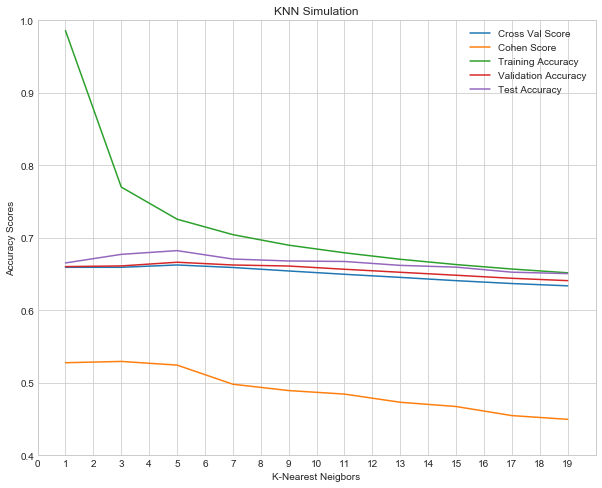

In [350]:
# Plot the Accuracy scores against KNN values
plt.figure(figsize = (10,8))
plt.style.use('seaborn-whitegrid')
ax = plt.axes()
ax.plot(df1["K-Nearest Neigbors"],df1["Cross Val Scores"],label='Cross Val Score')
ax.set(xlim=(0,20),ylim=(0.4,1.0),xlabel = "K-Nearest Neigbors",ylabel="Accuracy Scores",title="KNN Simulation")
plt.plot(df1["K-Nearest Neigbors"],df1["Cohen Score"],label='Cohen Score')
plt.plot(df1["K-Nearest Neigbors"],df1["Training Model Accuracy Score"],label='Training Accuracy')
plt.plot(df1["K-Nearest Neigbors"],df1["Validation Model Accuracy Score"],label='Validation Accuracy')
plt.plot(df1["K-Nearest Neigbors"],df1["Test Model Accuracy Score"],label='Test Accuracy')
plt.xticks(range(0,20,1))
plt.legend()
plt.show()

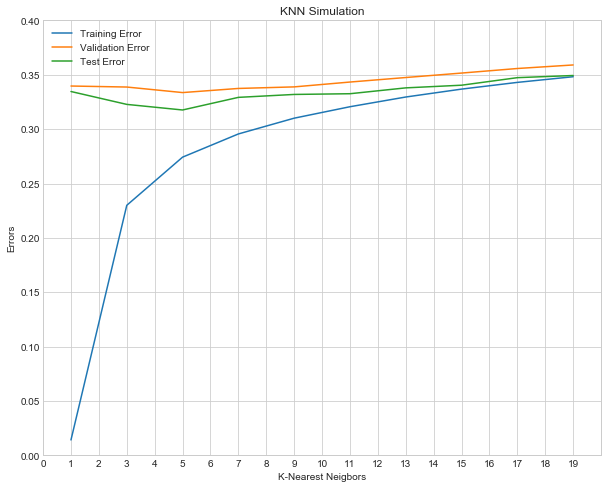

In [352]:
# Plot the Training and Test Errors against KNN Values to identify the sweet spot / optimal value
plt.figure(figsize = (10,8))
plt.style.use('seaborn-whitegrid')
ax = plt.axes()
ax.plot(df1["K-Nearest Neigbors"],df1["Training Error"],label='Training Error')
ax.set(xlim=(0,20),ylim=(0,0.4),xlabel = "K-Nearest Neigbors",ylabel="Errors",title="KNN Simulation")
plt.plot(df1["K-Nearest Neigbors"],df1["Validation Error"],label='Validation Error')
plt.plot(df1["K-Nearest Neigbors"],df1["Test Error"],label='Test Error')
plt.xticks(range(0,20,1))
plt.legend()
plt.show()

In [91]:
### KNN with 5
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
X = sn_df1["SD - DD - Caller"]
y = sn_df1["Assignment Group ID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
n = 5
print(" k - ",n)
nb = Pipeline([('vect', CountVectorizer()),
               ('clf', KNeighborsClassifier(n_neighbors= n)),
              ])
nb.fit(X_train, y_train)
scores = cross_val_score(nb, X_train, y_train, cv=5,scoring="accuracy")
y_pred_class_test = nb.predict(X_test)
print("Train Accuracy - ",nb.score(X_train, y_train))
print("Validation Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test))
# Validation data that is unseen by the model earlier
X_val = df_val1["SD - DD - Caller"]
y_val = df_val1["Assignment group IDs"]
#X_val_dtm = vect.transform(X_val)
y_pred_class_val = nb.predict(X_val) 
print("Test Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val))
cohen_score = cohen_kappa_score(y_val, y_pred_class_val)
print("cohen_score - ",cohen_score)
#print("k = ", n, ", Cross Val score = ",scores.mean(),"cohen_score = " ,cohen_score,", Training Accuracy = ",nb.score(X_train, y_train),", Validation Accuracy = ",nb.score(X_test, y_test),", Test Accuracy = ",metrics.accuracy_score(y_val, y_pred_class_val))
print(classification_report(y_val, y_pred_class_val))

 k -  5
Train Accuracy -  0.7257576622338907
Validation Accuracy -  0.6663670262351844
Test Data Set Accuracy (Unseen data by the model -  0.6823810948250075
cohen_score -  0.5244579381880823
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.63      0.26      0.36        47
           2       0.00      0.00      0.00        14
           3       0.27      0.13      0.17       273
           4       0.00      0.00      0.00        15
           5       0.20      0.32      0.25       234
           8       1.00      0.27      0.42        15
           9       0.00      0.00      0.00        28
          10       0.79      0.71      0.75       507
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00        12
          15       0.00      0.00      0.00         0
          16       0.07      0.10      0.08        31
          17       0.45      0.23      0.31        

C:\Users\Jathin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jathin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Jathin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jathin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Jathin\Anaconda3\li

# Multinomial Naive Bayes Classifier - Count Vect - Hyper parameters

In [67]:
### Without doing any EDA analysis and removing the stop words, lower case, ngram (1,2), ascii, max_features = 500000...
### Multinomial Naive Bayes
X = sn_df1["SD - DD - Caller"]
y = sn_df1["Assignment Group ID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
nb = Pipeline([('vect', CountVectorizer(stop_words='english',lowercase=True,ngram_range=(1, 2),strip_accents = 'ascii',max_features = 500000)),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)
y_pred_class_test = nb.predict(X_test)

print("Train Accuracy - ",nb.score(X_train, y_train)*100)
print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)

# Validation data that is unseen by the model earlier
X_val = df_val1["SD - DD - Caller"]
y_val = df_val1["Assignment group IDs"]
#X_val_dtm = vect.transform(X_val)
y_pred_class_val = nb.predict(X_val) 
print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
cohen_score = cohen_kappa_score(y_val, y_pred_class_val)
print("cohen_score",cohen_score)
#print('accuracy %s' % accuracy_score(y_val, y_pred_class_val))
#print(classification_report(y_test, y_pred_class_test))

Train Accuracy -  78.41304720050225
Test Accuracy -  69.56319083766147
Validation Data Set Accuracy (Unseen data by the model -  72.16272808854323
cohen_score 0.6090681660829858


# Decision Tree Classifier

In [107]:
### Post EDA analysis 
### Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
X = sn_df1["SD - DD - Caller"]
y = sn_df1["Assignment Group ID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

reg_sim =[]
for i in range(10,120,20):
    for j in range(1,5,1):
        reg_sim.append(dt_reg(i,j))


Max Depth : 10 , Min_samples_leaf : 1 , Cross Val score =  0.5821234441264573 , cohen_score =  0.35885558658146766 , Training Score: 0.5890502825181211 , Validation Score: 0.5797709415368225 , Test Score: 0.6067005683517799
Max Depth : 10 , Min_samples_leaf : 2 , Cross Val score =  0.5821666378462174 , cohen_score =  0.35758577850022977 , Training Score: 0.5876804976884881 , Validation Score: 0.5794047143427886 , Test Score: 0.6057433443015255
Max Depth : 10 , Min_samples_leaf : 3 , Cross Val score =  0.5821233731799542 , cohen_score =  0.3567769588898727 , Training Score: 0.5869099937218195 , Validation Score: 0.5794380077240645 , Test Score: 0.6053843852826802
Max Depth : 10 , Min_samples_leaf : 4 , Cross Val score =  0.5824082942304475 , cohen_score =  0.35640426110134715 , Training Score: 0.5861965641230523 , Validation Score: 0.5797043547742708 , Test Score: 0.6052049057732576
Max Depth : 30 , Min_samples_leaf : 1 , Cross Val score =  0.6394226385005491 , cohen_score =  0.48470134

In [89]:
def dt_reg(max_depth,min_samples_leaf):
    nb = Pipeline([('vect', CountVectorizer()),
                   ('clf', (DecisionTreeClassifier(criterion = 'entropy' , max_depth = max_depth, min_samples_leaf=min_samples_leaf,random_state=100))),
                  ])
    nb.fit(X_train, y_train)
    scores = cross_val_score(nb, X_train, y_train, cv=5,scoring="accuracy")
    y_pred_class_test = nb.predict(X_test)
    #print("Train Accuracy - ",nb.score(X_train, y_train)*100)
    #print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)
    # Validation data that is unseen by the model earlier
    X_val = df_val1["SD - DD - Caller"]
    y_val = df_val1["Assignment group IDs"]
    #X_val_dtm = vect.transform(X_val)
    y_pred_class_val = nb.predict(X_val) 
    #print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
    cohen_score = cohen_kappa_score(y_val, y_pred_class_val)
    #print("cohen_score",cohen_score)
    print("Max Depth :",max_depth,", Min_samples_leaf :",min_samples_leaf,", Cross Val score = ",scores.mean(), ", cohen_score = " ,cohen_score,", Training Score:",nb.score(X_train , y_train),", Validation Score:",nb.score(X_test , y_test),", Test Score:",metrics.accuracy_score(y_val, y_pred_class_val))
    return [max_depth,min_samples_leaf,scores.mean(),cohen_score,nb.score(X_train, y_train),nb.score(X_test, y_test),metrics.accuracy_score(y_val, y_pred_class_val)]
    #return [n,scores.mean(),cohen_score,nb.score(X_train, y_train),nb.score(X_test, y_test),metrics.accuracy_score(y_val, y_pred_class_val)]
#print('accuracy %s' % accuracy_score(y_val, y_pred_class_val))
#print(classification_report(y_test, y_pred_class_test))

In [108]:
# from the above data, creating a new data frame with Max Depth, Minimum Samples Leaf, Accuracy Scores and Errors for plotting
df2 = pd.DataFrame(reg_sim)
df2.rename(columns={0: 'Max Depth', 1: 'Minimum Samples Leaf', 2: 'Cross Val Score', 3: 'Cohen Score', 4: 'Training Model Accuracy Score', 5: 'Validation Model Accuracy Score',  6: 'Test Model Accuracy Score'}, inplace=True)
df2["Training Error"] = 1 - df2["Training Model Accuracy Score"]
df2["Validation Error"] = 1 - df2["Validation Model Accuracy Score"]
df2["Test Error"] = 1 - df2["Test Model Accuracy Score"]
df2.head(25)

,Max Depth,Minimum Samples Leaf,Cross Val Score,Cohen Score,Training Model Accuracy Score,Validation Model Accuracy Score,Test Model Accuracy Score,Training Error,Validation Error,Test Error
0,10,1,0.582123,0.358856,0.589050,0.579771,0.606701,0.410950,0.420229,0.393299
1,10,2,0.582167,0.357586,0.587680,0.579405,0.605743,0.412320,0.420595,0.394257
2,10,3,0.582123,0.356777,0.586910,0.579438,0.605384,0.413090,0.420562,0.394616
3,10,4,0.582408,0.356404,0.586197,0.579704,0.605205,0.413803,0.420296,0.394795
4,30,1,0.639423,0.484701,0.803750,0.643195,0.648459,0.196250,0.356805,0.351541
5,30,2,0.633529,0.476624,0.754965,0.635904,0.642118,0.245035,0.364096,0.357882
6,30,3,0.634399,0.478137,0.731679,0.638600,0.644032,0.268321,0.361400,0.355968
7,30,4,0.639106,0.479992,0.716726,0.640298,0.646904,0.283274,0.359702,0.353096
8,50,1,0.647739,0.505516,0.899563,0.649620,0.653545,0.100437,0.350380,0.346455
9,50,2,0.633556,0.492942,0.807460,0.634871,0.641819,0.192540,0.365129,0.358181


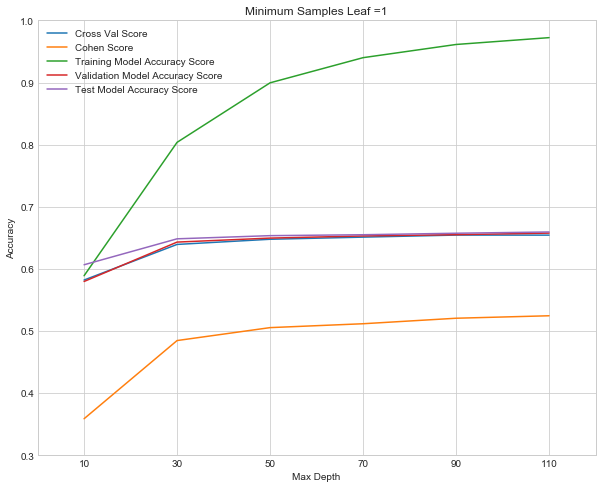

In [113]:
# Plotting the Training and Test Errors against Max Depth to find  the sweet spot / optimal point for Minimum Samples Leaf =1
pddf1 = df2[df2["Minimum Samples Leaf"]==1]
plt.figure(figsize = (10,8))
plt.style.use('seaborn-whitegrid')
ax = plt.axes()
ax.plot(pddf1["Max Depth"],pddf1["Cross Val Score"],label='Cross Val Score')
ax.set(xlim=(0,120),ylim=(0.3,1.0),xlabel = "Max Depth",ylabel="Accuracy",title="Minimum Samples Leaf =1")
plt.plot(pddf1["Max Depth"],pddf1["Cohen Score"],label='Cohen Score')
plt.plot(pddf1["Max Depth"],pddf1["Training Model Accuracy Score"],label='Training Model Accuracy Score')
plt.plot(pddf1["Max Depth"],pddf1["Validation Model Accuracy Score"],label='Validation Model Accuracy Score')
plt.plot(pddf1["Max Depth"],pddf1["Test Model Accuracy Score"],label='Test Model Accuracy Score')
plt.xticks(range(10,120,20))
plt.legend()
plt.show()

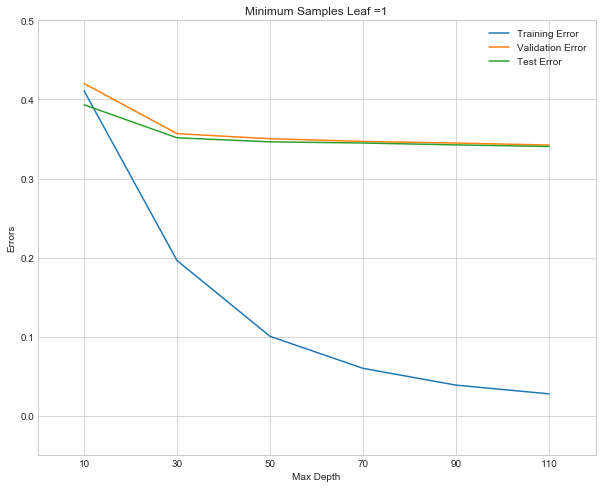

In [112]:
# Plotting the Training and Test Errors against Max Depth to find  the sweet spot / optimal point for Minimum Samples Leaf =1
pddf1 = df2[df2["Minimum Samples Leaf"]==1]
plt.figure(figsize = (10,8))
plt.style.use('seaborn-whitegrid')
ax = plt.axes()
ax.plot(pddf1["Max Depth"],pddf1["Training Error"],label='Training Error')
ax.set(xlim=(0,120),ylim=(-0.05,0.5),xlabel = "Max Depth",ylabel="Errors",title="Minimum Samples Leaf =1")
plt.plot(pddf1["Max Depth"],pddf1["Validation Error"],label='Validation Error')
plt.plot(pddf1["Max Depth"],pddf1["Test Error"],label='Test Error')
plt.xticks(range(10,120,20))
plt.legend()
plt.show()

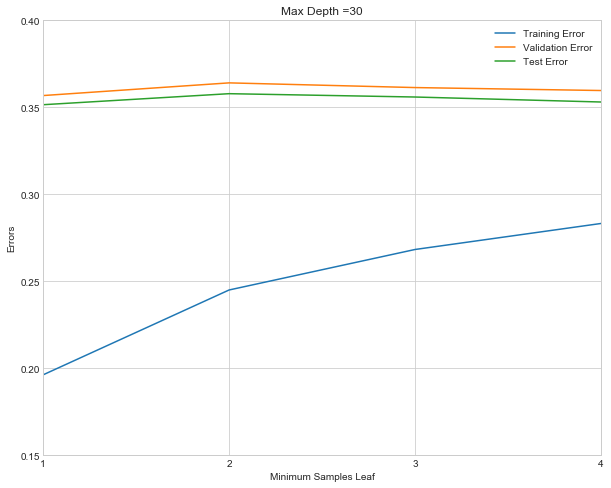

In [120]:
# Based on the above plot, for a minimum samples leaf of 1, Max Depth of 3 shows 
# both Training and Test Errors are at minimum
# Plotting the Training and Test Errors against Minimum Sample Leaf to find  the sweet spot / optimal point for Max Depth =3
pddf1 = df2[df2["Max Depth"]==30]
plt.figure(figsize = (10,8))
plt.style.use('seaborn-whitegrid')
ax = plt.axes()
ax.plot(pddf1["Minimum Samples Leaf"],pddf1["Training Error"],label='Training Error')
ax.set(xlim=(1,4),ylim=(0.15,0.4),xlabel = "Minimum Samples Leaf",ylabel="Errors",title="Max Depth =30")
ax.plot(pddf1["Minimum Samples Leaf"],pddf1["Validation Error"],label='Validation Error')
plt.plot(pddf1["Minimum Samples Leaf"],pddf1["Test Error"],label='Test Error')
plt.xticks(range(1,5,1))
plt.legend()
plt.show()

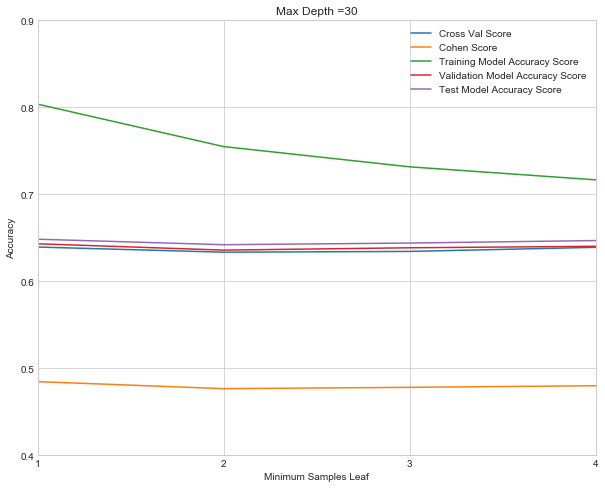

In [122]:
# Based on the above plot, for a minimum samples leaf of 1, Max Depth of 3 shows 
# both Training and Test Errors are at minimum
# Plotting the Training and Test Errors against Minimum Sample Leaf to find  the sweet spot / optimal point for Max Depth =3
pddf1 = df2[df2["Max Depth"]==30]
plt.figure(figsize = (10,8))
plt.style.use('seaborn-whitegrid')
ax = plt.axes()
ax.plot(pddf1["Minimum Samples Leaf"],pddf1["Cross Val Score"],label='Cross Val Score')
ax.set(xlim=(1,4),ylim=(0.4,0.9),xlabel = "Minimum Samples Leaf",ylabel="Accuracy",title="Max Depth =30")
ax.plot(pddf1["Minimum Samples Leaf"],pddf1["Cohen Score"],label='Cohen Score')
plt.plot(pddf1["Minimum Samples Leaf"],pddf1["Training Model Accuracy Score"],label='Training Model Accuracy Score')
plt.plot(pddf1["Minimum Samples Leaf"],pddf1["Validation Model Accuracy Score"],label='Validation Model Accuracy Score')
plt.plot(pddf1["Minimum Samples Leaf"],pddf1["Test Model Accuracy Score"],label='Test Model Accuracy Score')
plt.xticks(range(1,5,1))
plt.legend()
plt.show()

In [126]:
### Without doing any EDA analysis and removing the stop words, lower case, ngram (1,2), ascii, max_features = 500000...
### Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
max_depth = 20
min_samples_leaf = 4
print("Decision Tree Classifier")
print("Max Depth - ", max_depth)
print("Minimum Samples Leaf - ", min_samples_leaf)

X = sn_df1["SD - DD - Caller"]
y = sn_df1["Assignment Group ID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
n = 5
nb = Pipeline([('vect', CountVectorizer()),
               ('clf', DecisionTreeClassifier(criterion = 'entropy' , max_depth = max_depth, min_samples_leaf=min_samples_leaf,random_state=100)),
              ])
nb.fit(X_train, y_train)
scores = cross_val_score(nb, X_train, y_train, cv=5,scoring="accuracy")
y_pred_class_test = nb.predict(X_test)

print("Train Accuracy - ",nb.score(X_train, y_train))
print("Validation Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test))
# Validation data that is unseen by the model earlier
X_val = df_val1["SD - DD - Caller"]
y_val = df_val1["Assignment group IDs"]
#X_val_dtm = vect.transform(X_val)
y_pred_class_val = nb.predict(X_val) 
print("Test Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val))
cohen_score = cohen_kappa_score(y_val, y_pred_class_val)
print("cohen_score - ",cohen_score)
#print("k = ", n, ", Cross Val score = ",scores.mean(),"cohen_score = " ,cohen_score,", Training Accuracy = ",nb.score(X_train, y_train),", Validation Accuracy = ",nb.score(X_test, y_test),", Test Accuracy = ",metrics.accuracy_score(y_val, y_pred_class_val))
print(classification_report(y_val, y_pred_class_val))

Decision Tree Classifier
Max Depth -  20
Minimum Samples Leaf -  4
Train Accuracy -  0.6610924034016323
Validation Accuracy -  0.6248834731655347
Test Data Set Accuracy (Unseen data by the model -  0.6334430152557583
cohen_score -  0.439156757356604
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.88      0.15      0.25        47
           2       0.00      0.00      0.00        14
           3       0.15      0.05      0.08       273
           4       0.00      0.00      0.00        15
           5       0.27      0.19      0.22       234
           6       0.00      0.00      0.00         0
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00        28
          10       0.53      0.68      0.60       507
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00        12
          16       0.16      0.10      0.12    

C:\Users\Jathin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jathin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Jathin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jathin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Jathin\Anaconda3\li

In [91]:
### Without doing any EDA analysis and removing the stop words, lower case, ngram (1,2), ascii, max_features = 500000...
### SVM
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
X = sn_df1["SD - DD - Caller"]
y = sn_df1["Assignment Group ID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42) 

vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
print("Vectorized X_train_shape -",X_train_dtm.shape)
X_test_dtm = vect.transform(X_test)

nb = OneVsRestClassifier(SVC())
nb.fit(X_train_dtm, y_train)
y_pred_class_test = nb.predict(X_test_dtm)

print("Train Accuracy - ",nb.score(X_train_dtm, y_train))
print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test))

# Validation data that is unseen by the model earlier
X_val = df_val1["SD - DD - Caller"]
y_val = df_val1["Assignment group IDs"]
X_val_dtm = vect.transform(X_val)
y_pred_class_val = nb.predict(X_val_dtm) 
print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val))
cohen_score = cohen_kappa_score(y_val, y_pred_class_val)
print("cohen_score",cohen_score)
#print('accuracy %s' % accuracy_score(y_val, y_pred_class_val))
#print(classification_report(y_test, y_pred_class_test))

Vectorized X_train_shape - (70084, 61267)
Train Accuracy -  0.5628388790594144
Test Accuracy -  0.5581635370888267
Validation Data Set Accuracy (Unseen data by the model -  0.6135207897098415
cohen_score 0.3539804628850727


In [92]:
### Without doing any EDA analysis and removing the stop words, lower case, ngram (1,2), ascii, max_features = 500000...
### SVM
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
X = sn_df1["SD - DD - Caller"]
y = sn_df1["Assignment Group ID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42) 

vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
print("Vectorized X_train_shape -",X_train_dtm.shape)
X_test_dtm = vect.transform(X_test)

nb = OneVsRestClassifier(LinearSVC())
nb.fit(X_train_dtm, y_train)
y_pred_class_test = nb.predict(X_test_dtm)

print("Train Accuracy - ",nb.score(X_train_dtm, y_train))
print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test))

# Validation data that is unseen by the model earlier
X_val = df_val1["SD - DD - Caller"]
y_val = df_val1["Assignment group IDs"]
X_val_dtm = vect.transform(X_val)
y_pred_class_val = nb.predict(X_val_dtm) 
print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val))
cohen_score = cohen_kappa_score(y_val, y_pred_class_val)
print("cohen_score",cohen_score)
#print('accuracy %s' % accuracy_score(y_val, y_pred_class_val))
#print(classification_report(y_test, y_pred_class_test))

Vectorized X_train_shape - (70084, 61267)


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train Accuracy -  0.9728326008789453
Test Accuracy -  0.7313224131042748
Validation Data Set Accuracy (Unseen data by the model -  0.7287466347591983
cohen_score 0.6375223844335328


# Random Forest Classifier

In [ ]:
### Without doing any EDA analysis and removing the stop words, lower case, ngram (1,2), ascii, max_features = 500000...
### Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X = sn_df1["SD - DD - Caller"]
y = sn_df1["Assignment Group ID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
rf_model = []
for i in range(10,120,20):
    rf_model.append(rf(i))

# of estimators =  10 , Cross Val score =  0.6999037536082553 , cohen_score =  0.562272210236872 , Training Accuracy =  0.9793676160036527 , Validation Accuracy =  0.7009588493807432 , Test Accuracy =  0.7023631468740652


In [93]:
def rf(n):
    nb = Pipeline([('vect', CountVectorizer()),
                   ('clf', RandomForestClassifier(n_estimators=n, random_state=0)),
                  ])
    nb.fit(X_train, y_train)
    scores = cross_val_score(nb, X_train, y_train, cv=5,scoring="accuracy")
    y_pred_class_test = nb.predict(X_test)
    #print("Train Accuracy - ",nb.score(X_train, y_train)*100)
    #print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)
    # Validation data that is unseen by the model earlier
    X_val = df_val1["SD - DD - Caller"]
    y_val = df_val1["Assignment group IDs"]
    #X_val_dtm = vect.transform(X_val)
    y_pred_class_val = nb.predict(X_val) 
    #print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
    cohen_score = cohen_kappa_score(y_val, y_pred_class_val)
    #print("cohen_score",cohen_score)
    print("# of estimators = ", n, ", Cross Val score = ",scores.mean(), ", cohen_score = " ,cohen_score,", Training Accuracy = ",nb.score(X_train, y_train),", Validation Accuracy = ",nb.score(X_test, y_test),", Test Accuracy = ",metrics.accuracy_score(y_val, y_pred_class_val))
    return [n,scores.mean(),cohen_score,nb.score(X_train, y_train),nb.score(X_test, y_test),metrics.accuracy_score(y_val, y_pred_class_val)]


In [61]:
# No EDA, Random Forest Classifier - one vs rest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
X = sn_df1["SD - DD - Caller"]
y = sn_df1["Assignment Group ID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

vect = CountVectorizer(stop_words='english',lowercase=True,ngram_range=(1, 2), strip_accents = 'ascii', max_features = 500000)
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
print("Vectorized X_train_shape -",X_train_dtm.shape)
X_test_dtm = vect.transform(X_test)

nb = OneVsRestClassifier(RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0))
nb.fit(X_train_dtm, y_train)
y_pred_class_test = nb.predict(X_test_dtm)

print("Train Accuracy - ",nb.score(X_train_dtm, y_train)*100)
print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)

# Validation data that is unseen by the model earlier
X_val = df_val1["SD - DD - Caller"]
y_val = df_val1["Assignment group IDs"]
X_val_dtm = vect.transform(X_val)
y_pred_class_val = nb.predict(X_val_dtm) 
print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
cohen_score = cohen_kappa_score(y_val, y_pred_class_val)
print("cohen_score",cohen_score)
#print('accuracy %s' % accuracy_score(y_val, y_pred_class_val))
#print(classification_report(y_test, y_pred_class_test))

Vectorized X_train_shape - (70084, 500000)
Train Accuracy -  47.78979510301923
Test Accuracy -  48.098947929151684
Validation Data Set Accuracy (Unseen data by the model -  48.034699371821716
cohen_score 0.0233240943886881


In [69]:
from sklearn.linear_model import LogisticRegression
### Without doing any EDA analysis and removing the stop words, lower case, ngram (1,2), ascii, max_features = 500000...
### Logistic Regression
X = sn_df1["SD - DD - Caller"]
y = sn_df1["Assignment Group ID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
nb = Pipeline([('vect', CountVectorizer()),
               ('clf', LogisticRegression(n_jobs=1, C=1e5)),
              ])
nb.fit(X_train, y_train)
y_pred_class_test = nb.predict(X_test)

print("Train Accuracy - ",nb.score(X_train, y_train)*100)
print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)

# Validation data that is unseen by the model earlier
X_val = df_val1["SD - DD - Caller"]
y_val = df_val1["Assignment group IDs"]
#X_val_dtm = vect.transform(X_val)
y_pred_class_val = nb.predict(X_val) 
print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
cohen_score = cohen_kappa_score(y_val, y_pred_class_val)
print("cohen_score",cohen_score)
#print('accuracy %s' % accuracy_score(y_val, y_pred_class_val))
#print(classification_report(y_test, y_pred_class_test))

C:\Users\Jathin\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train Accuracy -  97.43022658524056
Test Accuracy -  75.8589692369157
Validation Data Set Accuracy (Unseen data by the model -  73.92162728088543
cohen_score 0.6268804541335307


In [131]:
### TFIDF Vectorizer, No EDA analysis...
X = sn_df1["SD - DD - Caller"]
y = sn_df1["Assignment Group ID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
nb = Pipeline([('vect', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

nb.fit(X_train, y_train)
y_pred_class_test = nb.predict(X_test)

print("Train Accuracy - ",nb.score(X_train, y_train)*100)
print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)

# Validation data that is unseen by the model earlier
X_val = df_val1["SD - DD - Caller"]
y_val = df_val1["Assignment group IDs"]
#X_val_dtm = vect.transform(X_val)
y_pred_class_val = nb.predict(X_val) 
print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
cohen_score = cohen_kappa_score(y_val, y_pred_class_val)
print("cohen_score",cohen_score)
#print('accuracy %s' % accuracy_score(y_val, y_pred_class_val))
#print(classification_report(y_test, y_pred_class_test))

Train Accuracy -  58.548313452428516
Test Accuracy -  57.93048341989613
Validation Data Set Accuracy (Unseen data by the model -  63.589590188453485
cohen_score 0.4053078411964278


In [89]:
### SGD Classifier with Count Vect, No EDA analysis...
from sklearn.linear_model import SGDClassifier
X = sn_df1["SD - DD - Caller"]
y = sn_df1["Assignment Group ID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
sgd = Pipeline([('vect', CountVectorizer(stop_words='english',lowercase=True,ngram_range=(1, 2),strip_accents = 'ascii',max_features = 500000)),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=500000, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
      ...dom_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [93]:
y_pred_class_test = sgd.predict(X_test)

print("Train Accuracy - ",sgd.score(X_train, y_train)*100)
print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)

# Validation data that is unseen by the model earlier
X_val = df_val1["SD - DD - Caller"]
y_val = df_val1["Assignment group IDs"]
#X_val_dtm = vect.transform(X_val)
y_pred_class_val = sgd.predict(X_val) 
print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
cohen_score = cohen_kappa_score(y_val, y_pred_class_val)
print("cohen_score",cohen_score)
#print('accuracy %s' % accuracy_score(y_val, y_pred_class_val))
#print(classification_report(y_test, y_pred_class_test))

Train Accuracy -  82.3354831345243
Test Accuracy -  72.78931948328672
Validation Data Set Accuracy (Unseen data by the model -  74.40023930601257
cohen_score 0.6344629946287436


In [127]:
### Gensim without EDA analysis
import gensim
from gensim.models import Word2Vec
from gensim import corpora

In [209]:
### Word2Vec Model using Google news pre-trained model - No EDA carried out for dataset
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [210]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

In [229]:
wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)

In [264]:
train, test = train_test_split(sn_df1, test_size=0.3, random_state = 42)

In [265]:
test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['SD - DD - Caller']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['SD - DD - Caller']), axis=1).values

In [ ]:
from sklearn.manifold import TSNE
model = Word2Vec(train_tokenized,min_count=1)
#words = list(model.wv.vocab)
words = model.wv.index2word

#words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [266]:
X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

In [267]:
### SGD Classifier with Count Vect, No EDA analysis...
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd.fit(X_train_word_average, train["Assignment Group ID"])

SGDClassifier(alpha=0.001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [268]:
y_pred_train = sgd.predict(X_train_word_average)

In [269]:
print('accuracy %s' % accuracy_score(y_pred_train, train["Assignment Group ID"]))

accuracy 0.5862964442668798


In [270]:
y_pred = sgd.predict(X_test_word_average)

In [271]:
print('accuracy %s' % accuracy_score(y_pred, test["Assignment Group ID"]))

accuracy 0.5829005193767479


In [275]:
y_pred_class_test = sgd.predict(X_test_word_average)

print("Train Accuracy - ",sgd.score(X_train_word_average, train["Assignment Group ID"])*100)
print("Test Accuracy - ",metrics.accuracy_score(y_pred_class_test,test["Assignment Group ID"])*100)

# Validation data that is unseen by the model earlier
#X_val = df_val1["SD - DD - Caller"]
#y_val = df_val1["Assignment group IDs"]
#val_tokenized = test.apply(lambda r: w2v_tokenize_text(r['SD - DD - Caller']), axis=1).values
#X_val_word_average = word_averaging_list(wv,val_tokenized)
#X_val_dtm = vect.transform(X_val)
#y_pred_class_val = sgd.predict(X_val_word_average) 
#print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_pred_class_val,y_val)*100)
cohen_score = cohen_kappa_score(test["Assignment Group ID"], y_pred_class_test)
print("cohen_score",cohen_score)
#print('accuracy %s' % accuracy_score(y_val, y_pred_class_val))
#print(classification_report(y_test, y_pred_class_test))

Train Accuracy -  58.629644426687975
Test Accuracy -  58.29005193767479
cohen_score 0.3530524940283065


# Neural Network on the dataset 

In [130]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

In [131]:
train_size = int(len(sn_df1) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(sn_df1) - train_size))

Train size: 70084
Test size: 30036


In [132]:
train_x = sn_df1["SD - DD - Caller"][:train_size]
train_y = sn_df1["Assignment Group ID"][:train_size]

test_x = sn_df1["SD - DD - Caller"][train_size:]
test_y = sn_df1["Assignment Group ID"][train_size:]

In [133]:
from keras.preprocessing import text, sequence
max_words = 10000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [134]:
tokenize.fit_on_texts(train_x) # only fit on train
X_train = tokenize.texts_to_matrix(train_x)
X_test = tokenize.texts_to_matrix(test_x)

In [135]:
y_train = train_y
y_test = test_y

In [136]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [137]:
print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (70084, 10000)
x_test shape: (30036, 10000)
y_train shape: (70084, 112)
y_test shape: (30036, 112)


In [138]:
batch_size = 32
epochs = 10

In [139]:
# Build the model - with additional layers...
model = Sequential()
model.add(Dense(units = 1000, activation ='relu', input_shape=(max_words,)))
model.add(Dense(units = 750, activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 500, activation ='relu'))
model.add(Dense(units = 250, activation ='relu'))
model.add(Dense(units = num_classes, activation = "softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [140]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_test, y_test))

Train on 70084 samples, validate on 30036 samples
Epoch 1/10
70084/70084 [==============================] - 321s 5ms/step - loss: 1.3801 - acc: 0.6722 - val_loss: 1.1570 - val_acc: 0.7305
Epoch 2/10
70084/70084 [==============================] - 375s 5ms/step - loss: 0.8273 - acc: 0.7815 - val_loss: 1.0751 - val_acc: 0.7469
Epoch 3/10
70084/70084 [==============================] - 443s 6ms/step - loss: 0.5684 - acc: 0.8411 - val_loss: 1.2158 - val_acc: 0.7489
Epoch 4/10
70084/70084 [==============================] - 344s 5ms/step - loss: 0.4126 - acc: 0.8842 - val_loss: 1.3738 - val_acc: 0.7442
Epoch 5/10
70084/70084 [==============================] - 357s 5ms/step - loss: 0.3312 - acc: 0.9063 - val_loss: 1.4770 - val_acc: 0.7324
Epoch 6/10
70084/70084 [==============================] - 397s 6ms/step - loss: 0.2857 - acc: 0.9197 - val_loss: 1.6618 - val_acc: 0.7335
Epoch 7/10
70084/70084 [==============================] - 436s 6ms/step - loss: 0.2512 - acc: 0.9300 - val_loss: 1.6950 - 

In [141]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              10001000  
_________________________________________________________________
dense_2 (Dense)              (None, 750)               750750    
_________________________________________________________________
dropout_1 (Dropout)          (None, 750)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               375500    
_________________________________________________________________
dense_4 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_5 (Dense)              (None, 112)               28112     
Total params: 11,280,612
Trainable params: 11,280,612
Non-trainable params: 0
________________________________________________________________

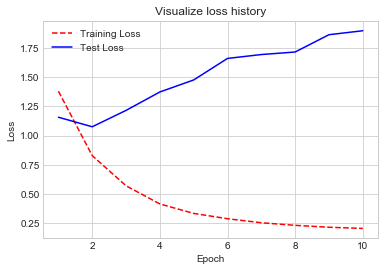

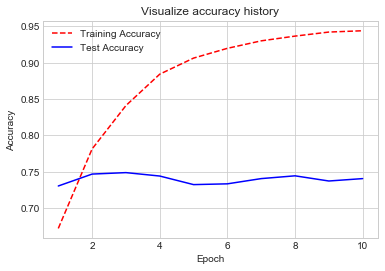

In [142]:
# Get training and test loss histories and also accuracies
training_loss = history.history['loss']
test_loss = history.history['val_loss']

training_acc = history.history['acc']
test_acc = history.history['val_acc']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.title('Visualize loss history')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

# Visualize accuracy history
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.title('Visualize accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

In [143]:
accuracy = model.evaluate(x=X_train,y=y_train,verbose=0)
print("Train Model Accuracy: ", accuracy[1])

Train Model Accuracy:  0.9568803150505109


In [145]:
accuracy = model.evaluate(x=X_test,y=y_test,verbose=0)
print("Validation Model Accuracy: ", accuracy[1])

Validation Model Accuracy:  0.7406778532427754


# RNN

In [150]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Conv1D, MaxPooling1D, Dropout
from sklearn.metrics import roc_auc_score
from keras.preprocessing import text, sequence

In [147]:
train_size = int(len(sn_df1) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(sn_df1) - train_size))

Train size: 70084
Test size: 30036


In [148]:
train_x = sn_df1["SD - DD - Caller"][:train_size]
train_y = sn_df1["Assignment Group ID"][:train_size]

test_x = sn_df1["SD - DD - Caller"][train_size:]
test_y = sn_df1["Assignment Group ID"][train_size:]

In [149]:
train_x.shape

(70084,)

In [151]:
# get the raw text data
train_x = train_x.astype(str)
test_x = test_x.astype(str)

In [155]:
max_words = 10000
# finally, vectorize the text samples into a 2D integer tensor
tokenizer = text.Tokenizer(num_words=max_words, char_level=False)
tokenizer.fit_on_texts(train_x)
sequences_train = tokenizer.texts_to_sequences(train_x)
sequences_test = tokenizer.texts_to_sequences(test_x)

In [157]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
type(tokenizer.word_index), len(tokenizer.word_index)

Found 58301 unique tokens.


(dict, 58301)

In [159]:
index_to_word = dict((i, w) for w, i in tokenizer.word_index.items())
" ".join([index_to_word[i] for i in sequences_train[0]])

'login issue verified user details employee manager checked user ad reset password advised user login check caller confirmed able login issue resolved brian conrad'

average length: 59.3
max length: 5358


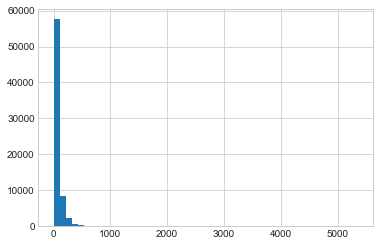

In [165]:
#Let's have a closer look at the tokenized sequences:
seq_lens = [len(s) for s in sequences_train]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))
plt.hist(seq_lens, bins=50)

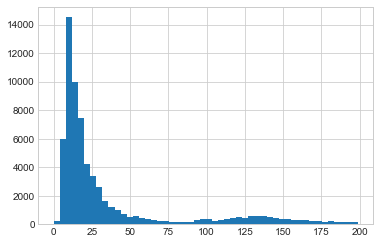

In [180]:
#Let's zoom on the distribution of regular sized texts. The vast majority of the texts have less than 75 symbols:
plt.hist([l for l in seq_lens if l < 200], bins=50);

In [181]:
MAX_SEQUENCE_LENGTH = 150

# pad sequences with 0s
X_train = pad_sequences(sequences_train, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X_train.shape)
print('Shape of data test tensor:', X_test.shape)

Shape of data tensor: (70084, 150)
Shape of data test tensor: (30036, 150)


In [192]:
y_train = train_y
y_test = test_y

y_train = to_categorical(np.asarray(y_train))
print('Shape of y_train tensor:', y_train.shape)
y_test = to_categorical(np.asarray(y_test))
print('Shape of y_test tensor:', y_test.shape)

Shape of y_train tensor: (70084, 112)
Shape of y_test tensor: (30036, 112)


In [183]:
from keras.layers import Dense, Input, Flatten
from keras.layers import GlobalAveragePooling1D, Embedding
from keras.models import Model

In [184]:
EMBEDDING_DIM = 50
N_CLASSES = 112

# input: a sequence of MAX_SEQUENCE_LENGTH integers
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

embedding_layer = Embedding(max_words, EMBEDDING_DIM,
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)
embedded_sequences = embedding_layer(sequence_input)

average = GlobalAveragePooling1D()(embedded_sequences)
predictions = Dense(N_CLASSES, activation='softmax')(average)

model = Model(sequence_input, predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['acc'])

In [194]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
          nb_epoch=10, batch_size=32)

Train on 70084 samples, validate on 30036 samples
Epoch 1/10
70084/70084 [==============================] - 16s 229us/step - loss: 1.3866 - acc: 0.6668 - val_loss: 1.4284 - val_acc: 0.6806
Epoch 2/10
70084/70084 [==============================] - 24s 349us/step - loss: 1.2740 - acc: 0.6889 - val_loss: 1.3654 - val_acc: 0.6910
Epoch 3/10
70084/70084 [==============================] - 24s 343us/step - loss: 1.1925 - acc: 0.7045 - val_loss: 1.3177 - val_acc: 0.6979
Epoch 4/10
70084/70084 [==============================] - 24s 342us/step - loss: 1.1246 - acc: 0.7167 - val_loss: 1.2767 - val_acc: 0.7019
Epoch 5/10
70084/70084 [==============================] - 24s 345us/step - loss: 1.0664 - acc: 0.7277 - val_loss: 1.2506 - val_acc: 0.7073
Epoch 6/10
70084/70084 [==============================] - 24s 347us/step - loss: 1.0165 - acc: 0.7372 - val_loss: 1.2266 - val_acc: 0.7094
Epoch 7/10
70084/70084 [==============================] - 25s 351us/step - loss: 0.9725 - acc: 0.7454 - val_loss: 1.

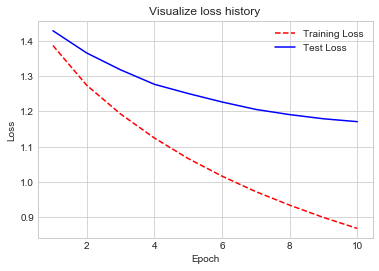

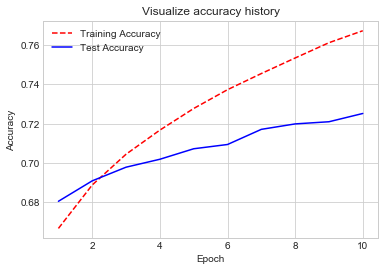

In [195]:
# Get training and test loss histories and also accuracies
training_loss = history.history['loss']
test_loss = history.history['val_loss']

training_acc = history.history['acc']
test_acc = history.history['val_acc']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.title('Visualize loss history')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

# Visualize accuracy history
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.title('Visualize accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

In [196]:
accuracy = model.evaluate(x=X_train,y=y_train,verbose=0)
print("Train Model Accuracy: ", accuracy[1])

Train Model Accuracy:  0.7760116431710519


In [197]:
accuracy = model.evaluate(x=X_test,y=y_test,verbose=0)
print("Validation Model Accuracy: ", accuracy[1])

Train Model Accuracy:  0.7251631375722203


# LSTM

In [ ]:
train_size = int(len(sn_df1) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(sn_df1) - train_size))

train_x = sn_df1["SD - DD - Caller"][:train_size]
train_y = sn_df1["Assignment Group ID"][:train_size]

test_x = sn_df1["SD - DD - Caller"][train_size:]
test_y = sn_df1["Assignment Group ID"][train_size:]

In [ ]:
# get the raw text data
train_x = train_x.astype(str)
test_x = test_x.astype(str)

y_train = train_y
y_test = test_y

y_train = to_categorical(np.asarray(y_train))
print('Shape of y_train tensor:', y_train.shape)
y_test = to_categorical(np.asarray(y_test))
print('Shape of y_test tensor:', y_test.shape)

In [ ]:
MAX_SEQUENCE_LENGTH = 150

# pad sequences with 0s
X_train = pad_sequences(sequences_train, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X_train.shape)
print('Shape of data test tensor:', X_test.shape)

In [202]:
# input: a sequence of MAX_SEQUENCE_LENGTH integers
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

x = LSTM(128, dropout=0.2, recurrent_dropout=0.2)(embedded_sequences)
predictions = Dense(N_CLASSES, activation='softmax')(x)

model = Model(sequence_input, predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [203]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
          nb_epoch=2, batch_size=32)

Train on 70084 samples, validate on 30036 samples
Epoch 1/2
70084/70084 [==============================] - 1684s 24ms/step - loss: 1.1791 - acc: 0.7052 - val_loss: 1.1854 - val_acc: 0.7201
Epoch 2/2
70084/70084 [==============================] - 1371s 20ms/step - loss: 0.8670 - acc: 0.7620 - val_loss: 1.0950 - val_acc: 0.7358


In [204]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 150)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 150, 50)           500000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               91648     
_________________________________________________________________
dense_10 (Dense)             (None, 112)               14448     
Total params: 606,096
Trainable params: 606,096
Non-trainable params: 0
_________________________________________________________________


In [205]:
accuracy = model.evaluate(x=X_train,y=y_train,verbose=0)
print("Train Model Accuracy: ", accuracy[1])

Train Model Accuracy:  0.7904371896581245


In [206]:
accuracy = model.evaluate(x=X_test,y=y_test,verbose=0)
print("Validation Model Accuracy: ", accuracy[1])

Validation Model Accuracy:  0.7358170195804771


## Gradient Boosting Classifier

In [55]:
X1 = ["Short description", "Description", "SD - DD", "SD - DD - Caller"]
#print(X.head())
y = sn_df1["Assignment Group ID"]
# check the shapes of X and y

Stat_NLP = []
for i in X1:
    X = sn_df1[i]
    print("X - ", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    vect = CountVectorizer(stop_words='english',lowercase=True,ngram_range=(1, 2), strip_accents = 'ascii', max_features = 500000)
    #vect = CountVectorizer(ngram_range=(1, 2))
    Stat_NLP.append(gbc_token(vect, X_train, X_test, y_train, y_test, i))

X -  Short description
Vectorized X_train_shape - (80105, 184745)
Train Accuracy -  75.81174708195493
Test Accuracy -  67.29914615269387
Validation Data Set Accuracy (Unseen data by the model -  69.6076085656179
X -  Description
Vectorized X_train_shape - (80105, 500000)
Train Accuracy -  77.79539354597091
Test Accuracy -  67.26918659809257
Validation Data Set Accuracy (Unseen data by the model -  68.2139011843522
X -  SD - DD
Vectorized X_train_shape - (80105, 500000)
Train Accuracy -  79.93633356219961
Test Accuracy -  69.59604533879263
Validation Data Set Accuracy (Unseen data by the model -  68.83000358894604
X -  SD - DD - Caller
Vectorized X_train_shape - (80105, 500000)
Train Accuracy -  0.6853504774982835
Test Accuracy -  0.5991910920257651
Validation Data Set Accuracy (Unseen data by the model -  5.419308529728436


In [54]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
# define a function that accepts a vectorizer and calculates the accuracy
def gbc_token(vect, X_train, X_test, y_train, y_test, feature_name):
    vect.fit(X_train)
    X_train_dtm = vect.transform(X_train)
    #print ('Features: ', X_train_dtm.shape[1])
    print("Vectorized X_train_shape -",X_train_dtm.shape)
    X_test_dtm = vect.transform(X_test)
    
    GBC=OneVsRestClassifier(GradientBoostingClassifier()).fit(X_train_dtm,y_train)
    
    y_pred_class_test = GBC.predict(X_test_dtm)
    print("Train Accuracy - ",GBC.score(X_train_dtm, y_train)*100)
    print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)
    
    # Validation data that is unseen by the model earlier
    X_val = df_val1[feature_name]
    y_val = df_val1["Assignment group IDs"]
    X_val_dtm = vect.transform(X_val)
    y_pred_class_val = GBC.predict(X_val_dtm) 
    print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
    
    return [feature_name, GBC.score(X_train_dtm, y_train)*100, metrics.accuracy_score(y_test, y_pred_class_test)*100, metrics.accuracy_score(y_val, y_pred_class_val)*100]
    
#     # Predictions
#     y_pred = le.inverse_transform(y_pred_class)
#     y_test1 = le.inverse_transform(y_test)
#     sn_df2 = pd.DataFrame()
#     sn_df2["y_pred"] = pd.Series(y_pred)
#     sn_df2["y_test1"] =  pd.Series(y_test1)
    
#     print(sn_df2.shape)
#     sn_df2["Pred"] = np.where((sn_df2["y_pred"] == sn_df2["y_test1"]),"True","False")
#     print(sn_df2["Pred"].value_counts())
#     print("Accuracy from this dataframe - ",(sn_df2[sn_df2["Pred"]=="True"].count()/sn_df2["Pred"].count()))



## SVM Technique

In [ ]:
X1 = ["Short description", "Description", "SD - DD", "SD - DD - Caller"]
#print(X.head())
y = sn_df1["Assignment Group ID"]
# check the shapes of X and y

Stat_NLP = []
for i in X1:
    X = sn_df1[i]
    print("X - ", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    vect = CountVectorizer(stop_words='english',lowercase=True,ngram_range=(1, 2), strip_accents = 'ascii', max_features = 500000)
    #vect = CountVectorizer(ngram_range=(1, 2))
    Stat_NLP.append(svm_token1(vect, X_train, X_test, y_train, y_test, i))

X -  Short description
Vectorized X_train_shape - (80105, 184745)
Train Accuracy -  54.89420136071407
Test Accuracy -  54.960802916063315
Validation Data Set Accuracy (Unseen data by the model -  57.907644455078355
X -  Description
Vectorized X_train_shape - (80105, 500000)


In [52]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC

# define a function that accepts a vectorizer and calculates the accuracy
def svm_token1(vect, X_train, X_test, y_train, y_test, feature_name):
    vect.fit(X_train)
    X_train_dtm = vect.transform(X_train)
    #print ('Features: ', X_train_dtm.shape[1])
    print("Vectorized X_train_shape -",X_train_dtm.shape)
    X_test_dtm = vect.transform(X_test)
    
    SVM=OneVsRestClassifier(SVC()).fit(X_train_dtm,y_train)
    
    y_pred_class_test = SVM.predict(X_test_dtm)
    print("Train Accuracy - ",SVM.score(X_train_dtm, y_train)*100)
    print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)
    
    # Validation data that is unseen by the model earlier
    X_val = df_val1[feature_name]
    y_val = df_val1["Assignment group IDs"]
    X_val_dtm = vect.transform(X_val)
    y_pred_class_val = SVM.predict(X_val_dtm) 
    print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
    
    return [feature_name, SVM.score(X_train_dtm, y_train)*100, metrics.accuracy_score(y_test, y_pred_class_test)*100, metrics.accuracy_score(y_val, y_pred_class_val)*100]
    
#     # Predictions
#     y_pred = le.inverse_transform(y_pred_class)
#     y_test1 = le.inverse_transform(y_test)
#     sn_df2 = pd.DataFrame()
#     sn_df2["y_pred"] = pd.Series(y_pred)
#     sn_df2["y_test1"] =  pd.Series(y_test1)
    
#     print(sn_df2.shape)
#     sn_df2["Pred"] = np.where((sn_df2["y_pred"] == sn_df2["y_test1"]),"True","False")
#     print(sn_df2["Pred"].value_counts())
#     print("Accuracy from this dataframe - ",(sn_df2[sn_df2["Pred"]=="True"].count()/sn_df2["Pred"].count()))



In [207]:
# define a function that accepts a vectorizer and calculates the accuracy
def svm_token(vect, X_train, X_test, y_train, y_test, feature_name):
    vect.fit(X_train)
    X_train_dtm = vect.transform(X_train)
    #print ('Features: ', X_train_dtm.shape[1])
    print("Vectorized X_train_shape -",X_train_dtm.shape)
    X_test_dtm = vect.transform(X_test)
    
    SVM = svm.SVC(C=1.0, kernel='linear', degree=2, gamma='auto')
    clf = OneVsRestClassifier(base_clf).fit(X_vectorized, y_train)
    SVM.fit(X_train_dtm, y_train)
    
    y_pred_class_test = SVM.predict(X_test_dtm)
    print("Train Accuracy - ",SVM.score(X_train_dtm, y_train)*100)
    print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)
    
    # Validation data that is unseen by the model earlier
    X_val = df_val1[feature_name]
    y_val = df_val1["Assignment group IDs"]
    X_val_dtm = vect.transform(X_val)
    y_pred_class_val = SVM.predict(X_val_dtm) 
    print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
    
    return [feature_name, SVM.score(X_train_dtm, y_train)*100, metrics.accuracy_score(y_test, y_pred_class_test)*100, metrics.accuracy_score(y_val, y_pred_class_val)*100]
    
#     # Predictions
#     y_pred = le.inverse_transform(y_pred_class)
#     y_test1 = le.inverse_transform(y_test)
#     sn_df2 = pd.DataFrame()
#     sn_df2["y_pred"] = pd.Series(y_pred)
#     sn_df2["y_test1"] =  pd.Series(y_test1)
    
#     print(sn_df2.shape)
#     sn_df2["Pred"] = np.where((sn_df2["y_pred"] == sn_df2["y_test1"]),"True","False")
#     print(sn_df2["Pred"].value_counts())
#     print("Accuracy from this dataframe - ",(sn_df2[sn_df2["Pred"]=="True"].count()/sn_df2["Pred"].count()))

## Count Vectorizer and TFIDF

In [124]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect, X_train, X_test, y_train, y_test, feature_name):
    df_cr = pd.DataFrame()
    vect.fit(X_train)
    X_train_dtm = vect.transform(X_train)
    #print ('Features: ', X_train_dtm.shape[1])
    print("Vectorized X_train_shape -",X_train_dtm.shape)
    X_test_dtm = vect.transform(X_test)
    
    nb = MultinomialNB()    
    nb.fit(X_train_dtm, y_train)    
    y_pred_class_test = nb.predict(X_test_dtm)
    print("Train Accuracy - ",nb.score(X_train_dtm, y_train)*100)
    print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)
    
    # Validation data that is unseen by the model earlier
    X_val = df_val1[feature_name]
    y_val = df_val1["Assignment group IDs"]
    X_val_dtm = vect.transform(X_val)
    y_pred_class_val = nb.predict(X_val_dtm) 
    print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
    df_cr = classification_report(y_val, y_pred_class_val) 
    print(df_cr)
    print(type(df_cr))
    cohen_score = cohen_kappa_score(y_val, y_pred_class_val)
    print("cohen_score",cohen_score)
    df_cr.to_csv("Classification Report.csv")
    
    
    return [feature_name, nb.score(X_train_dtm, y_train)*100, metrics.accuracy_score(y_test, y_pred_class_test)*100, metrics.accuracy_score(y_val, y_pred_class_val)*100]
    
#     # Predictions
#     y_pred = le.inverse_transform(y_pred_class)
#     y_test1 = le.inverse_transform(y_test)
#     sn_df2 = pd.DataFrame()
#     sn_df2["y_pred"] = pd.Series(y_pred)
#     sn_df2["y_test1"] =  pd.Series(y_test1)
    
#     print(sn_df2.shape)
#     sn_df2["Pred"] = np.where((sn_df2["y_pred"] == sn_df2["y_test1"]),"True","False")
#     print(sn_df2["Pred"].value_counts())
#     print("Accuracy from this dataframe - ",(sn_df2[sn_df2["Pred"]=="True"].count()/sn_df2["Pred"].count()))

### TFIDF

In [189]:
X1 = ["Short description", "Description", "SD - DD", "SD - DD - Caller"]
#print(X.head())
y = sn_df1["Assignment Group ID"]
# check the shapes of X and y

Stat_NLP = []
for i in X1:
    X = sn_df1[i]
    print("X - ", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    vect = TfidfVectorizer()
    #vect = CountVectorizer(ngram_range=(1, 2))
    Stat_NLP.append(tokenize_test(vect, X_train, X_test, y_train, y_test, i))

X -  Short description
Vectorized X_train_shape - (80105, 38164)
Train Accuracy -  59.95880406965858
Test Accuracy -  59.20507315124581
Validation Data Set Accuracy (Unseen data by the model -  63.87127646847709
X -  Description
Vectorized X_train_shape - (80105, 125165)
Train Accuracy -  58.011360089882025
Test Accuracy -  57.69710890298098
Validation Data Set Accuracy (Unseen data by the model -  63.35087929178131
X -  SD - DD
Vectorized X_train_shape - (80105, 133147)
Train Accuracy -  58.091255227513884
Test Accuracy -  57.76202127128377
Validation Data Set Accuracy (Unseen data by the model -  63.428639789448496
X -  SD - DD - Caller
Vectorized X_train_shape - (80105, 134426)
Train Accuracy -  57.899007552587236
Test Accuracy -  57.6371897937784
Validation Data Set Accuracy (Unseen data by the model -  63.25517406388323


### Count Vectorizer

In [188]:
X1 = ["Short description", "Description", "SD - DD", "SD - DD - Caller"]
#print(X.head())
y = sn_df1["Assignment Group ID"]
# check the shapes of X and y

Stat_NLP = []
for i in X1:
    X = sn_df1[i]
    print("X - ", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    vect = CountVectorizer()
    #vect = CountVectorizer(ngram_range=(1, 2))
    Stat_NLP.append(tokenize_test(vect, X_train, X_test, y_train, y_test, i))

X -  Short description
Vectorized X_train_shape - (80105, 38164)
Train Accuracy -  67.80101117283566
Test Accuracy -  64.68267838418136
Validation Data Set Accuracy (Unseen data by the model -  66.73047015193205
X -  Description
Vectorized X_train_shape - (80105, 125165)
Train Accuracy -  67.56132575994009
Test Accuracy -  64.47795476107255
Validation Data Set Accuracy (Unseen data by the model -  66.25194401244168
X -  SD - DD
Vectorized X_train_shape - (80105, 133147)
Train Accuracy -  70.21659072467386
Test Accuracy -  66.23058870524791
Validation Data Set Accuracy (Unseen data by the model -  68.25577222155759
X -  SD - DD - Caller
Vectorized X_train_shape - (80105, 134426)
Train Accuracy -  71.74583359340865
Test Accuracy -  67.48888999850202
Validation Data Set Accuracy (Unseen data by the model -  69.6494796028233


In [187]:
X1 = ["Short description", "Description", "SD - DD", "SD - DD - Caller"]
#print(X.head())
y = sn_df1["Assignment Group ID"]
# check the shapes of X and y

Stat_NLP = []
for i in X1:
    X = sn_df1[i]
    print("X - ", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    vect = CountVectorizer(stop_words='english',lowercase=True,ngram_range=(1, 2))
    #vect = CountVectorizer(ngram_range=(1, 2))
    Stat_NLP.append(tokenize_test(vect, X_train, X_test, y_train, y_test, i))

X -  Short description
Vectorized X_train_shape - (80105, 187163)
Train Accuracy -  76.07390300230948
Test Accuracy -  67.05447645678333
Validation Data Set Accuracy (Unseen data by the model -  68.83000358894604
X -  Description
Vectorized X_train_shape - (80105, 807543)
Train Accuracy -  75.40103614006615
Test Accuracy -  66.37539321915415
Validation Data Set Accuracy (Unseen data by the model -  67.5678908960402
X -  SD - DD
Vectorized X_train_shape - (80105, 893617)
Train Accuracy -  78.76661881280819
Test Accuracy -  68.6023867778499
Validation Data Set Accuracy (Unseen data by the model -  70.16987677951909
X -  SD - DD - Caller
Vectorized X_train_shape - (80105, 934523)
Train Accuracy -  79.78403345608889
Test Accuracy -  69.93059369850701
Validation Data Set Accuracy (Unseen data by the model -  71.3243210910396


In [115]:
X1 = ["Short description", "Description", "SD - DD", "SD - DD - Caller", "SD - DD - Dept", "SD - DD - Caller - Dept"]
#print(X.head())
y = sn_df1["Assignment Group ID"]
# check the shapes of X and y

Stat_NLP = []
for i in X1:
    X = sn_df1[i]
    print("X - ", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    vect = CountVectorizer(stop_words='english',lowercase=True,ngram_range=(1, 2), strip_accents = 'ascii', max_features = 500000)
    #vect = CountVectorizer(ngram_range=(1, 2))
    Stat_NLP.append(tokenize_test(vect, X_train, X_test, y_train, y_test, i))

X -  Short description
Vectorized X_train_shape - (80096, 187927)
Train Accuracy -  83.137734718338
Test Accuracy -  75.12485017978426
Validation Data Set Accuracy (Unseen data by the model -  75.23781034998504
cohen_score 0.636302416598047
X -  Description
Vectorized X_train_shape - (80096, 500000)
Train Accuracy -  79.98526767878545
Test Accuracy -  72.96743907311226
Validation Data Set Accuracy (Unseen data by the model -  73.6703559676937
cohen_score 0.6212580748250374
X -  SD - DD
Vectorized X_train_shape - (80096, 500000)
Train Accuracy -  82.91175589292848
Test Accuracy -  75.19976028765481
Validation Data Set Accuracy (Unseen data by the model -  75.45318576129225
cohen_score 0.6524819321922168
X -  SD - DD - Caller
Vectorized X_train_shape - (80096, 500000)
Train Accuracy -  83.13274071114662
Test Accuracy -  75.53435876947663
Validation Data Set Accuracy (Unseen data by the model -  76.15913849835478
cohen_score 0.6620470277359466
X -  SD - DD - Dept
Vectorized X_train_shape 

In [125]:
X1 = ["SD - DD - Caller"]
#print(X.head())
y = sn_df1["Assignment Group ID"]
# check the shapes of X and y

Stat_NLP = []
for i in X1:
    X = sn_df1[i]
    print("X - ", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    vect = CountVectorizer(stop_words='english',lowercase=True,ngram_range=(1, 2), strip_accents = 'ascii', max_features = 500000)
    #vect = CountVectorizer(ngram_range=(1, 2))
    Stat_NLP.append(tokenize_test(vect, X_train, X_test, y_train, y_test, i))

X -  SD - DD - Caller
Vectorized X_train_shape - (80096, 500000)
Train Accuracy -  83.13274071114662
Test Accuracy -  75.53435876947663
Validation Data Set Accuracy (Unseen data by the model -  76.15913849835478
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        47
           1       0.89      0.66      0.76       535
           2       0.85      0.83      0.84      1777
           3       0.50      0.02      0.04        47
           4       0.75      0.40      0.52       349
           5       1.00      0.41      0.58       970
           6       0.95      0.72      0.82        75
           7       0.81      0.93      0.86      7989
           8       1.00      0.01      0.03        74
           9       0.48      0.08      0.14       153
          10       1.00      0.04      0.08        24
          11       0.43      0.07      0.12       220
          12       0.52      0.11      0.18        98
          13       0.68      0.

AttributeError: 'str' object has no attribute 'to_csv'

In [126]:
sn_df1.head()

,Caller [Incident],Assignment group,Department,Short description,Description,Assignment group new,SD - DD,SD - DD - Caller,SD - DD - Dept,SD - DD - Caller - Dept,Assignment Group ID
0,Brian Conrad,GSO - Service Desk,IFBG,login issue,-verified user details. employee manager na...,L1/L2,login issue - -verified user details. employee...,login issue - -verified user details. employee...,login issue - -verified user details. employee...,login issue - -verified user details. employee...,7
1,Kim Walker,GSO - Service Desk,INBG,outlook,hello team meetings/skype meetings etc appear...,L1/L2,outlook - hello team meetings/skype meetings ...,outlook - hello team meetings/skype meetings ...,outlook - hello team meetings/skype meetings ...,outlook - hello team meetings/skype meetings ...,7
2,Jaques Van Der Berg,GSO - Service Desk,IFBG,cant log vpn,hi cannot log vpn best regards jaques van der ...,L1/L2,cant log vpn - hi cannot log vpn best regards ...,cant log vpn - hi cannot log vpn best regards ...,cant log vpn - hi cannot log vpn best regards ...,cant log vpn - hi cannot log vpn best regards ...,7
3,John Johnson,GSO - Service Desk,INBG,unable access adp page,unable access adp page,L1/L2,unable access adp page - unable access adp page,unable access adp page - unable access adp pag...,unable access adp page - unable access adp pag...,unable access adp page - unable access adp pag...,7
4,Ian Bonnar,GSO - Service Desk,NaN,unable log euremote,unable log euremote,L1/L2,unable log euremote - unable log euremote,unable log euremote - unable log euremote - Ia...,The,The,7


In [197]:
X1 = ["Short description", "Description", "SD - DD", "SD - DD - Caller"]
#print(X.head())
y = sn_df1["Assignment Group ID"]
# check the shapes of X and y

Stat_NLP = []
for i in X1:
    X = sn_df1[i]
    print("X - ", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    vect = CountVectorizer(stop_words='english',lowercase=True,ngram_range=(1, 3), strip_accents = 'ascii', max_features = 900000)
    #vect = CountVectorizer(ngram_range=(1, 2))
    Stat_NLP.append(tokenize_test(vect, X_train, X_test, y_train, y_test, i))

X -  Short description
Vectorized X_train_shape - (80105, 368875)
Train Accuracy -  79.69290306472755
Test Accuracy -  67.11439556598592
Validation Data Set Accuracy (Unseen data by the model -  68.51298002153368
X -  Description
Vectorized X_train_shape - (80105, 900000)
Train Accuracy -  73.46857249859559
Test Accuracy -  65.49657961751635
Validation Data Set Accuracy (Unseen data by the model -  65.54611795669338
X -  SD - DD
Vectorized X_train_shape - (80105, 900000)
Train Accuracy -  77.50452531052993
Test Accuracy -  68.6722924052529
Validation Data Set Accuracy (Unseen data by the model -  70.31343462136618
X -  SD - DD - Caller
Vectorized X_train_shape - (80105, 900000)
Train Accuracy -  78.88895824230697
Test Accuracy -  70.08538473061367
Validation Data Set Accuracy (Unseen data by the model -  71.90453403517168


In [185]:
# from the above data , create a new dataframe with all Training & Test accuracy scores along with Train & Test Errors
con_df = pd.DataFrame(Stat_NLP)
con_df.rename(columns={0: 'Feature', 1: 'Training Model Accuracy Score', 2: 'Testing Model Accuracy Score', 3: 'Validation Model Accuracy Score (unseen)'}, inplace=True)
con_df.head()

,Feature,Training Model Accuracy Score,Testing Model Accuracy Score,Validation Model Accuracy Score (unseen)
0,Short description,73.412396,66.125730,68.052399
1,Description,72.734536,65.366755,66.790286
2,SD - DD,76.102615,67.399011,69.087211
3,SD - DD - Caller,77.073841,68.442602,70.205766


## Stemming using Porter Stemmer

In [200]:
#porter_stemmer=PorterStemmer()
porter_stemmer=SnowballStemmer("english")
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

In [203]:
X1 = ["Short description", "Description", "SD - DD", "SD - DD - Caller"]
#print(X.head())
y = sn_df1["Assignment Group ID"]
# check the shapes of X and y

Stat_NLP = []
for i in X1:
    X = sn_df1[i].apply(stem_sentences)
    print("X - ", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    vect = CountVectorizer(stop_words='english',lowercase=True,ngram_range=(1, 2), strip_accents = 'ascii', max_features = 500000)
    #vect = CountVectorizer(ngram_range=(1, 2))
    Stat_NLP.append(tokenize_test1(vect, X_train, X_test, y_train, y_test, i))

X -  Short description
Vectorized X_train_shape - (80105, 176280)
Train Accuracy -  74.8168029461332
Test Accuracy -  66.58511010136317
Validation Data Set Accuracy (Unseen data by the model -  68.86589304940782
X -  Description
Vectorized X_train_shape - (80105, 500000)
Train Accuracy -  72.27389051869422
Test Accuracy -  65.76621560892795
Validation Data Set Accuracy (Unseen data by the model -  66.41344658451968
X -  SD - DD
Vectorized X_train_shape - (80105, 500000)
Train Accuracy -  75.56831658448286
Test Accuracy -  68.1929395316323
Validation Data Set Accuracy (Unseen data by the model -  69.86481636559397
X -  SD - DD - Caller
Vectorized X_train_shape - (80105, 500000)
Train Accuracy -  77.22239560576743
Test Accuracy -  69.71089029809757
Validation Data Set Accuracy (Unseen data by the model -  71.51573154683575


In [201]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test1(vect, X_train, X_test, y_train, y_test, feature_name):
    vect.fit(X_train)
    X_train_dtm = vect.transform(X_train)
    #print ('Features: ', X_train_dtm.shape[1])
    print("Vectorized X_train_shape -",X_train_dtm.shape)
    X_test_dtm = vect.transform(X_test)
    
    nb = MultinomialNB()    
    nb.fit(X_train_dtm, y_train)
    
    y_pred_class_test = nb.predict(X_test_dtm)
    print("Train Accuracy - ",nb.score(X_train_dtm, y_train)*100)
    print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)
    
    # Validation data that is unseen by the model earlier
    X_val = df_val1[feature_name].apply(stem_sentences)
    y_val = df_val1["Assignment group IDs"]
    X_val_dtm = vect.transform(X_val)
    y_pred_class_val = nb.predict(X_val_dtm) 
    print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
    
    return [feature_name, nb.score(X_train_dtm, y_train)*100, metrics.accuracy_score(y_test, y_pred_class_test)*100, metrics.accuracy_score(y_val, y_pred_class_val)*100]
    
#     # Predictions
#     y_pred = le.inverse_transform(y_pred_class)
#     y_test1 = le.inverse_transform(y_test)
#     sn_df2 = pd.DataFrame()
#     sn_df2["y_pred"] = pd.Series(y_pred)
#     sn_df2["y_test1"] =  pd.Series(y_test1)
    
#     print(sn_df2.shape)
#     sn_df2["Pred"] = np.where((sn_df2["y_pred"] == sn_df2["y_test1"]),"True","False")
#     print(sn_df2["Pred"].value_counts())
#     print("Accuracy from this dataframe - ",(sn_df2[sn_df2["Pred"]=="True"].count()/sn_df2["Pred"].count()))

In [44]:
import nltk
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [50]:
# define a function that accepts text and returns a list of lemmas
from textblob import TextBlob, Word
def split_into_lemmas(text):
    text = text.lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [48]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test2(vect, X_train, X_test, y_train, y_test, feature_name):
    vect.fit(X_train)
    X_train_dtm = vect.transform(X_train)
    #print ('Features: ', X_train_dtm.shape[1])
    print("Vectorized X_train_shape -",X_train_dtm.shape)
    X_test_dtm = vect.transform(X_test)
    
    nb = MultinomialNB()    
    nb.fit(X_train_dtm, y_train)
    
    y_pred_class_test = nb.predict(X_test_dtm)
    print("Train Accuracy - ",nb.score(X_train_dtm, y_train)*100)
    print("Test Accuracy - ",metrics.accuracy_score(y_test, y_pred_class_test)*100)
    
    # Validation data that is unseen by the model earlier
    X_val = df_val1[feature_name].apply(split_into_lemmas)
    y_val = df_val1["Assignment group IDs"]
    X_val_dtm = vect.transform(X_val)
    y_pred_class_val = nb.predict(X_val_dtm) 
    print("Validation Data Set Accuracy (Unseen data by the model - ",metrics.accuracy_score(y_val, y_pred_class_val)*100)
    
    return [feature_name, nb.score(X_train_dtm, y_train)*100, metrics.accuracy_score(y_test, y_pred_class_test)*100, metrics.accuracy_score(y_val, y_pred_class_val)*100]
    
#     # Predictions
#     y_pred = le.inverse_transform(y_pred_class)
#     y_test1 = le.inverse_transform(y_test)
#     sn_df2 = pd.DataFrame()
#     sn_df2["y_pred"] = pd.Series(y_pred)
#     sn_df2["y_test1"] =  pd.Series(y_test1)
    
#     print(sn_df2.shape)
#     sn_df2["Pred"] = np.where((sn_df2["y_pred"] == sn_df2["y_test1"]),"True","False")
#     print(sn_df2["Pred"].value_counts())
#     print("Accuracy from this dataframe - ",(sn_df2[sn_df2["Pred"]=="True"].count()/sn_df2["Pred"].count()))

In [51]:
X1 = ["Short description", "Description", "SD - DD", "SD - DD - Caller"]
#print(X.head())
y = sn_df1["Assignment Group ID"]
# check the shapes of X and y

Stat_NLP = []
for i in X1:
    X = sn_df1[i].apply(split_into_lemmas)
    print("X - ", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    vect = CountVectorizer(stop_words='english',ngram_range=(1, 2), strip_accents = 'ascii', max_features = 500000)
    #vect = CountVectorizer(ngram_range=(1, 2))
    Stat_NLP.append(tokenize_test2(vect, X_train, X_test, y_train, y_test, i))

X -  Short description


AttributeError: 'list' object has no attribute 'lower'

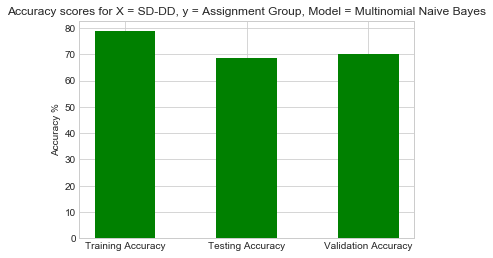

In [51]:
Trg_acc = nb.score(X_train_dtm, y_train)
Test_acc = metrics.accuracy_score(y_test, y_pred_class)
Val_acc = metrics.accuracy_score(y_val, y_pred_class1)
#print(Trg_acc,Test_acc,Val_acc)
# Plotting the accuracy results
plt.figure(figsize = (6,4))
plt.style.use('seaborn-whitegrid')
ax = plt.axes()
x = ["Training Accuracy" , "Testing Accuracy", "Validation Accuracy"]
y = [Trg_acc*100,Test_acc*100,Val_acc*100]
ax.bar(x, y,width=0.5,color='g',align='center')
ax.set(ylabel="Accuracy %",title="Accuracy scores for X = SD-DD, y = Assignment Group, Model = Multinomial Naive Bayes")
#plt.title("Accuracy scores for X = SD-DD, y = Assignment Group, Model = Multinomial Naive Bayes ")
#plt.legend()
plt.show()